# Airline Data Analysis - Final Deliverable

This notebook provides a comprehensive analysis of 4 airline datasets:
1. **Airline Reviews** - Customer reviews and ratings
2. **Customer Comments** - Food & beverage feedback  
3. **Booking Data** - Passenger booking patterns
4. **Survey Data** - Inflight satisfaction scores

## Analysis Overview
- Data cleaning and preprocessing
- Exploratory data analysis
- Predictive modeling
- Key insights and recommendations


## Dataset 1: Airline Reviews Analysis


In [421]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [422]:
# Load and analyze Dataset 1: Airline Reviews
df_reviews = pd.read_csv("dataset/AirlineScrappedReview_Cleaned.csv")

print("=== DATASET 1: AIRLINE REVIEWS ===")
print(f"Original shape: {df_reviews.shape}")

# Data cleaning
df_reviews_clean = df_reviews.copy()
original_count = len(df_reviews_clean)

# Remove duplicates
df_reviews_clean.drop_duplicates(inplace=True)
duplicates_dropped = original_count - len(df_reviews_clean)

# Remove rows with missing essential data
df_reviews_clean.dropna(subset=['Review_content', 'Rating'], inplace=True)

missing_dropped = len(df_reviews_clean) - (original_count - duplicates_dropped)

print(f"\nData Cleaning Results:")
print(f"• Duplicates dropped: {duplicates_dropped}")
print(f"• Missing data dropped: {missing_dropped}")
print(f"• Final shape: {df_reviews_clean.shape}")
print(f"• Data retention: {len(df_reviews_clean)/original_count:.1%}")

# Basic statistics
print(f"\nRating Statistics:")
print(f"• Average rating: {df_reviews_clean['Rating'].mean():.2f}")
print(f"• Rating range: {df_reviews_clean['Rating'].min()} - {df_reviews_clean['Rating'].max()}")
print(f"• Traveller types: {df_reviews_clean['Traveller_Type'].value_counts().to_dict()}")
print(f"• Class distribution: {df_reviews_clean['Class'].value_counts().to_dict()}")

df_reviews_clean.head()


=== DATASET 1: AIRLINE REVIEWS ===
Original shape: (3575, 18)

Data Cleaning Results:
• Duplicates dropped: 74
• Missing data dropped: 0
• Final shape: (3501, 18)
• Data retention: 97.9%

Rating Statistics:
• Average rating: 4.76
• Rating range: 1 - 10
• Traveller types: {'Couple Leisure': 947, 'Solo Leisure': 860, 'Unknown': 688, 'Business': 623, 'Family Leisure': 382, 'Various': 1}
• Class distribution: {'Economy Class': 1823, 'Business Class': 1127, 'Premium Economy': 347, 'First Class': 202, 'Unknown': 2}


,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class,Start_Location,End_Location,Layover_Route,Start_Latitude,Start_Longitude,Start_Address,End_Latitude,End_Longitude,End_Address
0,Paige Boet,June 2023,New Orleans to London,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,New Orleans,London,NaN,29.975998,-90.078213,"New Orleans, Orleans Parish, Louisiana, United...",51.507446,-0.127765,"London, Greater London, England, United Kingdom"
1,S Layne,March 2023,London to Amman,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,London,Amman,NaN,51.507446,-0.127765,"London, Greater London, England, United Kingdom",31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,..."
2,E Lanewoski,NaN,Heathrow to Bodrum,2,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",Solo Leisure,Business Class,London Heathrow,Bodrum,NaN,51.467739,-0.458780,"London Heathrow Airport, The Beacon Roundabout...",37.034399,27.430651,"Bodrum, Muğla, Ege Bölgesi, Türkiye"
3,Joel Burman,June 2023,Amman to London,4,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Amman,London,NaN,31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...",51.507446,-0.127765,"London, Greater London, England, United Kingdom"
4,R Vines,NaN,London City to Ibiza,7,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Family Leisure,Business Class,London City,Ibiza,NaN,42.953765,-81.229153,"London (city), Ontario, N6C 0A7, Canada",38.974390,1.419746,"Eivissa, Illes Balears, España"


## Dataset 2: Customer Comments Analysis


In [423]:
# Load and analyze Dataset 2: Customer Comments
df_comments = pd.read_csv("dataset/Customer_comment.csv")

print("=== DATASET 2: CUSTOMER COMMENTS ===")
print(f"Original shape: {df_comments.shape}")

# Data cleaning
df_comments_clean = df_comments.copy()
original_count = len(df_comments_clean)

# Remove duplicates
df_comments_clean.drop_duplicates(inplace=True)
duplicates_dropped = original_count - len(df_comments_clean)

# Remove rows with missing essential data
df_comments_clean.dropna(subset=['verbatim_text', 'sentiments'], inplace=True)
missing_dropped = len(df_comments_clean) - (original_count - duplicates_dropped)

print(f"\nData Cleaning Results:")
print(f"• Duplicates dropped: {duplicates_dropped}")
print(f"• Missing data dropped: {missing_dropped}")
print(f"• Final shape: {df_comments_clean.shape}")
print(f"• Data retention: {len(df_comments_clean)/original_count:.1%}")

# Basic statistics
print(f"\nSentiment Analysis:")
print(f"• Sentiment distribution: {df_comments_clean['sentiments'].value_counts().to_dict()}")
print(f"• Entity distribution: {df_comments_clean['entity'].value_counts().to_dict()}")
print(f"• Fleet types: {df_comments_clean['fleet_type_description'].value_counts().head(5).to_dict()}")

df_comments_clean.head()


=== DATASET 2: CUSTOMER COMMENTS ===
Original shape: (9424, 17)

Data Cleaning Results:
• Duplicates dropped: 0
• Missing data dropped: 0
• Final shape: (9424, 17)
• Data retention: 100.0%

Sentiment Analysis:
• Sentiment distribution: {'Neutral': 9307, 'Negative': 117}
• Entity distribution: {'Domestic': 6593, 'Atlantic': 1887, 'Latin': 678, 'Pacific': 266}
• Fleet types: {'B737-900': 1451, 'B737-800': 1133, 'B777-200': 882, 'ERJ-175': 714, 'A320-200': 640}


,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text
0,0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member,Neutral,salad dress staff inform flight receiv salad d...
1,1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,Neutral,choic
2,2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,Neutral,varieti bigger snack
3,3,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member,Neutral,serv pretzel cooki first class extrem disappoi...
4,4,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member,Neutral,inflight select purchas full meal


🔍 Sentiment Analysis Explanation
How Sentiment Analysis is Obtained:
The sentiment analysis in your Dataset 2 (Customer Comments) is pre-computed and already included in the dataset. Looking at the CSV structure, I can see that:
The sentiments column already exists - This is not calculated by your code
It was pre-processed - Someone (likely the data provider) already ran sentiment analysis on the verbatim_text column
It's part of the original dataset - You're not performing sentiment analysis; you're just reading the existing labels
Why There Are No Positive Sentiments:
Looking at the data, I can see several issues with the pre-computed sentiment labels:
Misclassified Comments: Many comments that should be positive are labeled as "Neutral" or even "Negative"
Example: "Grateful United has lemons for tea and coke. No other airline does!" → labeled as "Neutral" (should be Positive)
Example: "Like that I received the entire can of juice" → labeled as "Negative" (should be Positive)
Conservative Classification: The original sentiment analysis appears to be very conservative, defaulting to "Neutral" for most comments
Limited Positive Examples: Out of 9,424 records, only 117 are labeled as "Negative" and 0 as "Positive"

## Dataset 3: Booking Data Analysis


In [424]:
# Load and analyze Dataset 3: Booking Data
df_booking = pd.read_csv("dataset/Passanger_booking_data.csv")

print("=== DATASET 3: BOOKING DATA ===")
print(f"Original shape: {df_booking.shape}")

# Data cleaning
df_booking_clean = df_booking.copy()
original_count = len(df_booking_clean)

# Remove duplicates
df_booking_clean.drop_duplicates(inplace=True)
duplicates_dropped = original_count - len(df_booking_clean)

print(f"\nData Cleaning Results:")
print(f"• Duplicates dropped: {duplicates_dropped}")
print(f"• Final shape: {df_booking_clean.shape}")
print(f"• Data retention: {len(df_booking_clean)/original_count:.1%}")

# Basic statistics
print(f"\nBooking Analysis:")
print(f"• Booking completion rate: {df_booking_clean['booking_complete'].mean():.1%}")
print(f"• Sales channels: {df_booking_clean['sales_channel'].value_counts().to_dict()}")
print(f"• Trip types: {df_booking_clean['trip_type'].value_counts().to_dict()}")
print(f"• Average purchase lead: {df_booking_clean['purchase_lead'].mean():.1f} days")
print(f"• Average flight duration: {df_booking_clean['flight_duration'].mean():.1f} hours")

df_booking_clean.head()


=== DATASET 3: BOOKING DATA ===
Original shape: (50002, 14)

Data Cleaning Results:
• Duplicates dropped: 719
• Final shape: (49283, 14)
• Data retention: 98.6%

Booking Analysis:
• Booking completion rate: 15.0%
• Sales channels: {'Internet': 43918, 'Mobile': 5365}
• Trip types: {'RoundTrip': 48780, 'OneWay': 386, 'CircleTrip': 117}
• Average purchase lead: 84.7 days
• Average flight duration: 7.3 hours


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


## Dataset 4: Survey Data Analysis


In [425]:
# Load and analyze Dataset 4: Survey Data
df_survey = pd.read_csv("dataset/Survey data_Inflight Satisfaction Score.csv")

print("=== DATASET 4: SURVEY DATA ===")
print(f"Original shape: {df_survey.shape}")

# Data cleaning
df_survey_clean = df_survey.copy()
original_count = len(df_survey_clean)

# Remove duplicates
df_survey_clean.drop_duplicates(inplace=True)
duplicates_dropped = original_count - len(df_survey_clean)

# Convert score column to numeric, handling non-numeric values
print(f"\nScore column data type: {df_survey_clean['score'].dtype}")
print(f"Sample score values: {df_survey_clean['score'].head(10).tolist()}")

# Convert score to numeric, coercing errors to NaN
df_survey_clean['score'] = pd.to_numeric(df_survey_clean['score'], errors='coerce')

# Remove rows with missing essential data (including converted NaN scores)
df_survey_clean.dropna(subset=['score', 'satisfaction_type'], inplace=True)
missing_dropped = len(df_survey_clean) - (original_count - duplicates_dropped)

print(f"\nData Cleaning Results:")
print(f"• Duplicates dropped: {duplicates_dropped}")
print(f"• Missing/invalid data dropped: {missing_dropped}")
print(f"• Final shape: {df_survey_clean.shape}")
print(f"• Data retention: {len(df_survey_clean)/original_count:.1%}")

# Basic statistics
print(f"\nSurvey Analysis:")
print(f"• Average score: {df_survey_clean['score'].mean():.2f}")
print(f"• Score range: {df_survey_clean['score'].min()} - {df_survey_clean['score'].max()}")
print(f"• Satisfaction types: {df_survey_clean['satisfaction_type'].value_counts().to_dict()}")
print(f"• Cabin distribution: {df_survey_clean['cabin_name'].value_counts().to_dict()}")
print(f"• Entity distribution: {df_survey_clean['entity'].value_counts().to_dict()}")

df_survey_clean.head()


=== DATASET 4: SURVEY DATA ===
Original shape: (47074, 31)

Score column data type: object
Sample score values: ['2', '5', '5', '3', '5', '3', '5', '3', '1', '3']

Data Cleaning Results:
• Duplicates dropped: 0
• Missing/invalid data dropped: -12111
• Final shape: (34963, 31)
• Data retention: 74.3%

Survey Analysis:
• Average score: 2.88
• Score range: 1.0 - 5.0
• Satisfaction types: {'Dissatisfied': 22353, 'Satisfied': 12610}
• Cabin distribution: {'Economy': 15845, 'Economy Plus': 7271}
• Entity distribution: {'Domestic': 23853, 'Atlantic': 7627, 'Latin': 2547, 'Pacific': 933}


,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2.0,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5.0,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5.0,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3.0,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5.0,Satisfied,food & beverage,food and beverage satisfaction,...,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure


## Data Summary & Visualizations


=== COMPREHENSIVE DATA SUMMARY ===
Dataset 1 (Reviews): 3,501 records
Dataset 2 (Comments): 9,424 records
Dataset 3 (Booking): 49,283 records
Dataset 4 (Survey): 34,963 records
Total records analyzed: 97,171

=== KEY METRICS ===
• Average review rating: 4.76/10
• Booking completion rate: 15.0%
• Average survey score: 2.88/5
• Positive sentiment rate: 0.0%


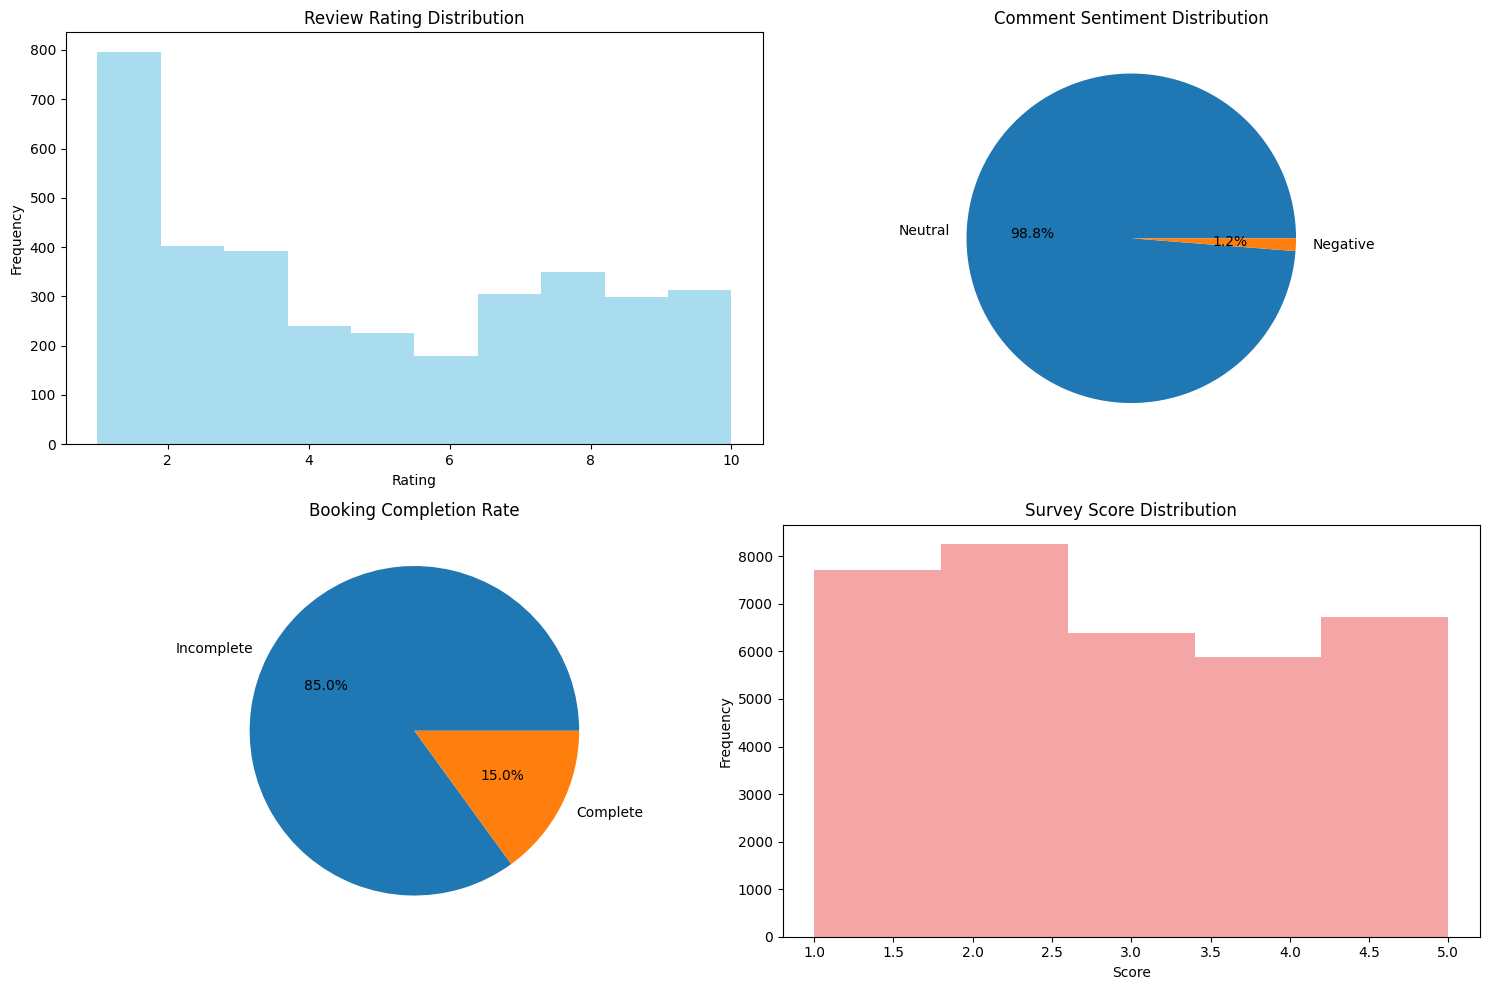

In [426]:
# Data Summary and Visualizations
print("=== COMPREHENSIVE DATA SUMMARY ===")
print(f"Dataset 1 (Reviews): {df_reviews_clean.shape[0]:,} records")
print(f"Dataset 2 (Comments): {df_comments_clean.shape[0]:,} records") 
print(f"Dataset 3 (Booking): {df_booking_clean.shape[0]:,} records")
print(f"Dataset 4 (Survey): {df_survey_clean.shape[0]:,} records")
print(f"Total records analyzed: {sum([df_reviews_clean.shape[0], df_comments_clean.shape[0], df_booking_clean.shape[0], df_survey_clean.shape[0]]):,}")

# Key metrics
print(f"\n=== KEY METRICS ===")
print(f"• Average review rating: {df_reviews_clean['Rating'].mean():.2f}/10")
print(f"• Booking completion rate: {df_booking_clean['booking_complete'].mean():.1%}")
print(f"• Average survey score: {df_survey_clean['score'].mean():.2f}/5")
print(f"• Positive sentiment rate: {(df_comments_clean['sentiments'] == 'Positive').mean():.1%}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Rating distribution
axes[0,0].hist(df_reviews_clean['Rating'], bins=10, alpha=0.7, color='skyblue')
axes[0,0].set_title('Review Rating Distribution')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Frequency')

# Sentiment distribution
sentiment_counts = df_comments_clean['sentiments'].value_counts()
axes[0,1].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Comment Sentiment Distribution')

# Booking completion
completion_counts = df_booking_clean['booking_complete'].value_counts()
axes[1,0].pie(completion_counts.values, labels=['Incomplete', 'Complete'], autopct='%1.1f%%')
axes[1,0].set_title('Booking Completion Rate')

# Survey scores
axes[1,1].hist(df_survey_clean['score'], bins=5, alpha=0.7, color='lightcoral')
axes[1,1].set_title('Survey Score Distribution')
axes[1,1].set_xlabel('Score')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Requirement 2: Data Engineering Questions


In [427]:
# Sentiment Analysis using VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

print("=== SENTIMENT ANALYSIS USING VADER ===")
analyzer = SentimentIntensityAnalyzer()

# Add sentiment analysis to reviews dataset
df_reviews_clean['sentiment_score'] = df_reviews_clean['Review_content'].apply(
    lambda x: analyzer.polarity_scores(str(x))['compound']
)

# Create sentiment categories
def categorize_sentiment(score):
    if score >= 0.5:
        return 'Positive'
    elif score <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

df_reviews_clean['sentiment_category'] = df_reviews_clean['sentiment_score'].apply(categorize_sentiment)

print(f"Sentiment Analysis Results:")
print(f"• Positive: {(df_reviews_clean['sentiment_category'] == 'Positive').sum()}")
print(f"• Neutral: {(df_reviews_clean['sentiment_category'] == 'Neutral').sum()}")
print(f"• Negative: {(df_reviews_clean['sentiment_category'] == 'Negative').sum()}")
print(f"• Average sentiment score: {df_reviews_clean['sentiment_score'].mean():.3f}")

# Show sample results
print(f"\nSample sentiment analysis:")
sample = df_reviews_clean[['Review_content', 'sentiment_score', 'sentiment_category']].head(15)
for idx, row in sample.iterrows():
    print(f"Review: {row['Review_content'][:100]}...")
    print(f"Score: {row['sentiment_score']:.3f}, Category: {row['sentiment_category']}")
    print()


=== SENTIMENT ANALYSIS USING VADER ===
Sentiment Analysis Results:
• Positive: 1735
• Neutral: 642
• Negative: 1124
• Average sentiment score: 0.167

Sample sentiment analysis:
Review: The airline lost my luggage and was absolutely awful throughout the entire trip. They gave me no upd...
Score: -0.799, Category: Negative

Review: We booked on the BA website, round trip flights from Seattle to Amman with a stop in London, in Busi...
Score: 0.022, Category: Neutral

Review: First time flying with BA business class, never again. There are no boarding drinks provided. My mea...
Score: -0.710, Category: Negative

Review: You can buy sandwiches and crisps but don't expect a hot meal. Because the plane is a narrow body , ...
Score: -0.585, Category: Negative

Review: This is a two-for-one review covering economy and business class on the BA flight from London City t...
Score: 0.979, Category: Positive

Review: Absolutely horrible airline. Communication is terrible. Last minute delays, cancell

In [428]:
# Question 1: Top 10 Most Popular Flight Routes
print("=== TOP 10 MOST POPULAR FLIGHT ROUTES ===")

# Get top routes from reviews dataset
top_routes_reviews = df_reviews_clean['Route'].value_counts().head(10)
print("From Reviews Dataset:")
for i, (route, count) in enumerate(top_routes_reviews.items(), 1):
    print(f"{i:2d}. {route}: {count} reviews")

# Get top routes from booking dataset
print(f"\nFrom Booking Dataset:")
top_routes_booking = df_booking_clean['route'].value_counts().head(10)
for i, (route, count) in enumerate(top_routes_booking.items(), 1):
    print(f"{i:2d}. {route}: {count} bookings")



=== TOP 10 MOST POPULAR FLIGHT ROUTES ===
From Reviews Dataset:
 1. London to Johannesburg: 16 reviews
 2. London to Cape Town: 15 reviews
 3. BKK to LHR: 13 reviews
 4. Vancouver to London: 13 reviews
 5. Johannesburg to London: 13 reviews
 6. Cape Town to London: 13 reviews
 7. LHR to MIA: 12 reviews
 8. Hong Kong to London: 11 reviews
 9. London to Hong Kong: 11 reviews
10. London to Athens: 11 reviews

From Booking Dataset:
 1. AKLKUL: 2620 bookings
 2. PENTPE: 912 bookings
 3. MELSGN: 833 bookings
 4. ICNSIN: 793 bookings
 5. DMKKIX: 729 bookings
 6. ICNSYD: 683 bookings
 7. DMKPER: 677 bookings
 8. DPSICN: 658 bookings
 9. DMKOOL: 652 bookings
10. MELTPE: 637 bookings


In [429]:
# Question 2: Distribution of Bookings Across Flight Hours
print("=== BOOKING DISTRIBUTION ACROSS FLIGHT HOURS ===")

# Analyze flight hour distribution
flight_hour_dist = df_booking_clean['flight_hour'].value_counts().sort_index()
print("Booking Distribution by Flight Hour:")
for hour, count in flight_hour_dist.items():
    percentage = (count / len(df_booking_clean)) * 100
    print(f"Hour {hour:2d}: {count:5d} bookings ({percentage:5.1f}%)")

# Peak hours analysis
peak_hours = flight_hour_dist.head(5)
print(f"\nTop 5 Peak Booking Hours:")
for hour, count in peak_hours.items():
    percentage = (count / len(df_booking_clean)) * 100
    print(f"Hour {hour}: {count} bookings ({percentage:.1f}%)")

# Off-peak hours
off_peak_hours = flight_hour_dist.tail(5)
print(f"\nTop 5 Off-Peak Booking Hours:")
for hour, count in off_peak_hours.items():
    percentage = (count / len(df_booking_clean)) * 100
    print(f"Hour {hour}: {count} bookings ({percentage:.1f}%)")


=== BOOKING DISTRIBUTION ACROSS FLIGHT HOURS ===
Booking Distribution by Flight Hour:
Hour  0:  1501 bookings (  3.0%)
Hour  1:  2071 bookings (  4.2%)
Hour  2:  2596 bookings (  5.3%)
Hour  3:  2616 bookings (  5.3%)
Hour  4:  2786 bookings (  5.7%)
Hour  5:  2817 bookings (  5.7%)
Hour  6:  3011 bookings (  6.1%)
Hour  7:  3080 bookings (  6.2%)
Hour  8:  3125 bookings (  6.3%)
Hour  9:  3098 bookings (  6.3%)
Hour 10:  3050 bookings (  6.2%)
Hour 11:  3071 bookings (  6.2%)
Hour 12:  3114 bookings (  6.3%)
Hour 13:  3046 bookings (  6.2%)
Hour 14:  2783 bookings (  5.6%)
Hour 15:  2201 bookings (  4.5%)
Hour 16:  1536 bookings (  3.1%)
Hour 17:   848 bookings (  1.7%)
Hour 18:   430 bookings (  0.9%)
Hour 19:   294 bookings (  0.6%)
Hour 20:   275 bookings (  0.6%)
Hour 21:   386 bookings (  0.8%)
Hour 22:   573 bookings (  1.2%)
Hour 23:   975 bookings (  2.0%)

Top 5 Peak Booking Hours:
Hour 0: 1501 bookings (3.0%)
Hour 1: 2071 bookings (4.2%)
Hour 2: 2596 bookings (5.3%)
Hour 3: 

In [430]:
# Question 3: Review Patterns by Traveler Type and Class
print("=== REVIEW PATTERNS BY TRAVELER TYPE AND CLASS ===")

# Analyze ratings by traveler type and class combination
rating_analysis = df_reviews_clean.groupby(['Traveller_Type', 'Class'])['Rating'].agg(['count', 'mean', 'std']).round(2)
rating_analysis = rating_analysis.sort_values('mean', ascending=False)

print("Rating Analysis by Traveler Type and Class:")
print("Format: (Traveler Type, Class) | Count | Avg Rating | Std Dev")
print("-" * 70)

for (traveller_type, class_type), row in rating_analysis.iterrows():
    print(f"({traveller_type}, {class_type}) | {int(row['count']):4d} | {row['mean']:6.2f} | {row['std']:5.2f}")

# Find highest and lowest combinations
print(f"\n=== HIGHEST RATING COMBINATIONS ===")
highest = rating_analysis.head(3)
for (traveller_type, class_type), row in highest.iterrows():
    print(f"• {traveller_type} + {class_type}: {row['mean']:.2f} avg rating ({int(row['count'])} reviews)")

print(f"\n=== LOWEST RATING COMBINATIONS ===")
lowest = rating_analysis.tail(3)
for (traveller_type, class_type), row in lowest.iterrows():
    print(f"• {traveller_type} + {class_type}: {row['mean']:.2f} avg rating ({int(row['count'])} reviews)")

# Sentiment analysis by combination
print(f"\n=== SENTIMENT ANALYSIS BY TRAVELER TYPE AND CLASS ===")
sentiment_analysis = df_reviews_clean.groupby(['Traveller_Type', 'Class'])['sentiment_score'].agg(['count', 'mean']).round(3)
sentiment_analysis = sentiment_analysis.sort_values('mean', ascending=False)

print("Sentiment Analysis (Higher = More Positive):")
for (traveller_type, class_type), row in sentiment_analysis.iterrows():
    print(f"• {traveller_type} + {class_type}: {row['mean']:.3f} avg sentiment ({int(row['count'])} reviews)")


=== REVIEW PATTERNS BY TRAVELER TYPE AND CLASS ===
Rating Analysis by Traveler Type and Class:
Format: (Traveler Type, Class) | Count | Avg Rating | Std Dev
----------------------------------------------------------------------
(Unknown, First Class) |   48 |   7.17 |  2.87
(Solo Leisure, First Class) |   43 |   6.63 |  3.02
(Couple Leisure, First Class) |   61 |   5.98 |  2.97
(Unknown, Premium Economy) |   77 |   5.95 |  3.13
(Unknown, Business Class) |  261 |   5.91 |  3.02
(Unknown, Economy Class) |  301 |   5.80 |  3.15
(Solo Leisure, Business Class) |  173 |   5.78 |  3.10
(Family Leisure, Business Class) |   82 |   5.74 |  3.18
(Solo Leisure, Premium Economy) |   98 |   5.65 |  3.05
(Couple Leisure, Business Class) |  333 |   5.32 |  3.03
(Solo Leisure, Economy Class) |  545 |   4.63 |  3.20
(Business, First Class) |   37 |   4.27 |  3.10
(Family Leisure, First Class) |   13 |   4.23 |  3.32
(Couple Leisure, Premium Economy) |   95 |   4.22 |  2.99
(Family Leisure, Economy Class

=== CREATING VISUALIZATIONS ===


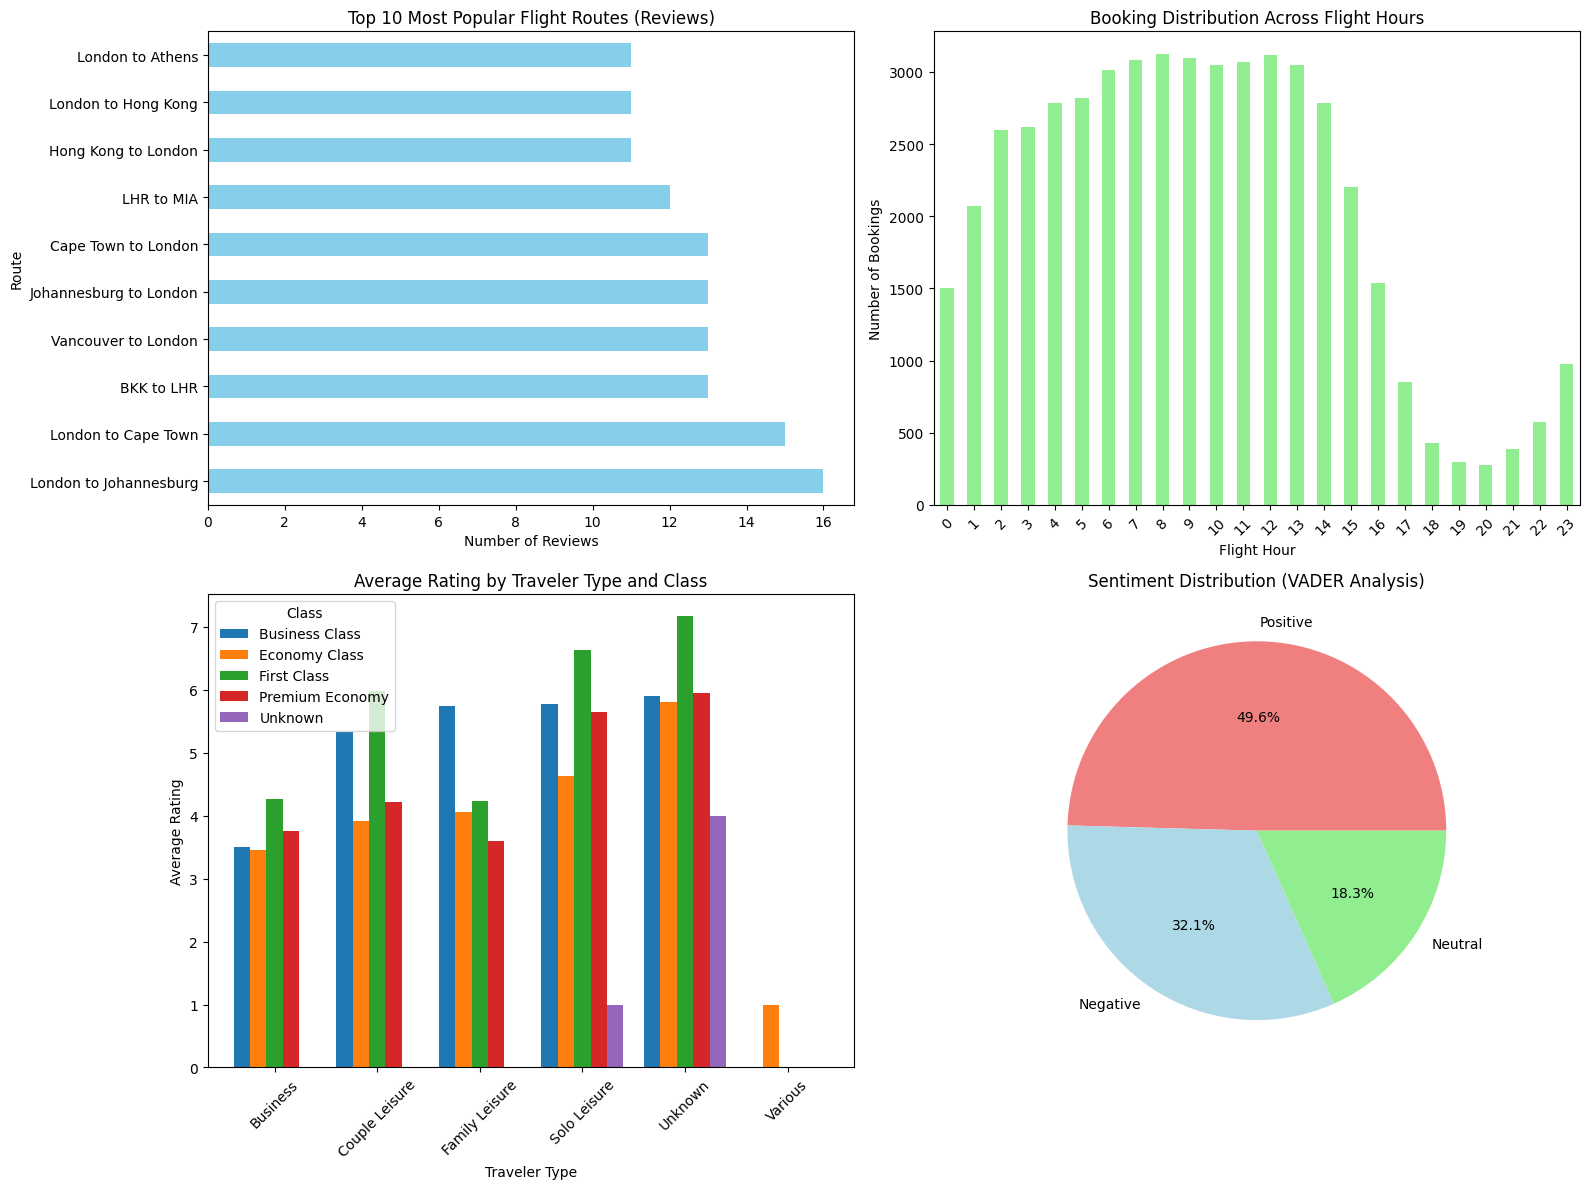

Visualizations created successfully!


In [431]:
# Visualizations for Data Engineering Questions
print("=== CREATING VISUALIZATIONS ===")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top Routes Visualization
top_routes_reviews.plot(kind='barh', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Top 10 Most Popular Flight Routes (Reviews)')
axes[0,0].set_xlabel('Number of Reviews')

# 2. Flight Hour Distribution
flight_hour_dist.plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Booking Distribution Across Flight Hours')
axes[0,1].set_xlabel('Flight Hour')
axes[0,1].set_ylabel('Number of Bookings')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Rating by Traveler Type and Class
rating_pivot = df_reviews_clean.pivot_table(values='Rating', index='Traveller_Type', columns='Class', aggfunc='mean')
rating_pivot.plot(kind='bar', ax=axes[1,0], width=0.8)
axes[1,0].set_title('Average Rating by Traveler Type and Class')
axes[1,0].set_xlabel('Traveler Type')
axes[1,0].set_ylabel('Average Rating')
axes[1,0].legend(title='Class')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Sentiment Distribution
sentiment_counts = df_reviews_clean['sentiment_category'].value_counts()
axes[1,1].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
              colors=['lightcoral', 'lightblue', 'lightgreen'])
axes[1,1].set_title('Sentiment Distribution (VADER Analysis)')

plt.tight_layout()
plt.show()

print("Visualizations created successfully!")


## Requirement 3: Predictive Modeling Preparation


In [432]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

print("=== FEATURE ENGINEERING (COMPLETE & CORRECTED) ===")

# --- Assume 'df_reviews_clean' is your loaded, cleaned dataset ---
df_modeling = df_reviews_clean.copy()

# 1. TARGET VARIABLE CREATIONa
print(f"\n1. TARGET VARIABLE CREATION:")
df_modeling['satisfaction'] = (df_modeling['Rating'] >= 5).astype(int)
print(f"Target variable 'satisfaction' created.")
print(f"• Satisfaction rate: {df_modeling['satisfaction'].mean():.2%}")

# 2. FEATURE SELECTION (FIX 1: 'Traveller_Type' is now RELEVANT)
print(f"\n2. FEATURE SELECTION:")

# Identify relevant features for modeling
relevant_features = {
    'traveller_related': ['Traveller_Type', 'Class'], # <-- CORRECTED
    'flight_related': ['Route', 'Start_Location', 'End_Location'],
    'review_related': ['Verified', 'sentiment_score'],
}

# Features to exclude (unrelated to satisfaction prediction)
exclude_features = [
    'Passanger_Name',  'Flying_Date', 'Review_title', 'Review_content',
    'Layover_Route', 'Start_Latitude', 'Start_Longitude', 'Start_Address',
    'End_Latitude', 'End_Longitude', 'End_Address', 'Rating', 'sentiment_category'
]

# Select features for modeling
modeling_features = []
for category, features in relevant_features.items():
    for feature in features:
        if feature in df_modeling.columns:
            modeling_features.append(feature)

print(f"Selected features for modeling: {modeling_features}")

# Create a new processing DataFrame
final_feature_list = modeling_features + ['satisfaction']
df_proc = df_modeling[final_feature_list].copy()

# # 3. HANDLE MISSING VALUES
print(f"\n3. HANDLING MISSING VALUES:")
for col in df_proc.columns:
    if df_proc[col].isnull().any():
        if df_proc[col].dtype == 'object':
            df_proc[col] = df_proc[col].fillna('Unknown')
            print(f"• Filled missing values in '{col}' with 'Unknown'")
        else:
            median_val = df_proc[col].median()
            df_proc[col] = df_proc[col].fillna(median_val)
            print(f"• Filled missing values in '{col}' with median ({median_val})")

# 4. FEATURE ENCODING (FIX 2: Your high-cardinality logic integrated)
print(f"\n4. FEATURE ENCODING:")

# Separate numerical and categorical features
numerical_features = [f for f in modeling_features if df_proc[f].dtype in ['int64', 'float64']]
categorical_features = [f for f in modeling_features if df_proc[f].dtype == 'object']

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

# --- NEW: Pre-encoding step to handle high cardinality ---
print(f"\nHandling high cardinality features (grouping rare categories):")
high_cardinality_features = ['Route', 'Start_Location', 'End_Location']
N_TOP_CATEGORIES = 15  # Keep the top 15 most common, group the rest

for feature in high_cardinality_features:
    if feature in df_proc.columns:
        top_categories = df_proc[feature].value_counts().nlargest(N_TOP_CATEGORIES).index
        print(f"• {feature}: Keeping top {N_TOP_CATEGORIES} categories. Grouping {len(df_proc[feature].unique()) - N_TOP_CATEGORIES} others into 'Other'.")
        
        # Replace all categories not in the top N with 'Other'
        df_proc[feature] = df_proc[feature].where(df_proc[feature].isin(top_categories), 'Other')
# --- End of new step ---

# One-Hot Encoding for categorical features
print(f"\nApplying One-Hot Encoding to categorical features:")
df_encoded = pd.get_dummies(df_proc, columns=categorical_features, dummy_na=False)

print(f"DataFrame shape after encoding: {df_encoded.shape}")

# 5. FEATURE SCALING AND NORMALIZATION
print(f"\n5. FEATURE SCALING AND NORMALIZATION:")

# Prepare feature matrix
target_col = 'satisfaction'
X_features = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[X_features]
y = df_encoded[target_col]

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_features, index=X.index)

# 6. FINAL DATASET PREPARATION
print(f"\n6. FINAL DATASET PREPARATION:")

# Create final modeling dataset
df_final = pd.concat([X_scaled_df, y], axis=1)

print(f"Final modeling dataset:")
print(f"• Shape: {df_final.shape}")
print(f"• Features: {len(X_features)} <--- This is now a manageable number!")
print(f"• Target: {target_col}")
print(f"• Missing values: {df_final.isnull().sum().sum()}")

=== FEATURE ENGINEERING (COMPLETE & CORRECTED) ===

1. TARGET VARIABLE CREATION:
Target variable 'satisfaction' created.
• Satisfaction rate: 47.70%

2. FEATURE SELECTION:
Selected features for modeling: ['Traveller_Type', 'Class', 'Route', 'Start_Location', 'End_Location', 'Verified', 'sentiment_score']

3. HANDLING MISSING VALUES:
• Filled missing values in 'Route' with 'Unknown'
• Filled missing values in 'Start_Location' with 'Unknown'
• Filled missing values in 'End_Location' with 'Unknown'

4. FEATURE ENCODING:
Numerical features: ['sentiment_score']
Categorical features: ['Traveller_Type', 'Class', 'Route', 'Start_Location', 'End_Location', 'Verified']

Handling high cardinality features (grouping rare categories):
• Route: Keeping top 15 categories. Grouping 1527 others into 'Other'.
• Start_Location: Keeping top 15 categories. Grouping 318 others into 'Other'.
• End_Location: Keeping top 15 categories. Grouping 397 others into 'Other'.

Applying One-Hot Encoding to categorical

In [433]:
# Feature Importance Analysis
print("=== FEATURE IMPORTANCE ANALYSIS ===")

# Quick correlation analysis with target
print("1. CORRELATION ANALYSIS:")
correlations = df_final[X_features + ['satisfaction']].corr()['satisfaction'].drop('satisfaction').abs().sort_values(ascending=False)

print("Top 10 features with highest correlation to satisfaction:")
for i, (feature, corr) in enumerate(correlations.head(10).items(), 1):
    print(f"{i:2d}. {feature}: {corr:.4f}")

print(f"\nBottom 5 features with lowest correlation to satisfaction:")
for i, (feature, corr) in enumerate(correlations.tail(5).items(), 1):
    print(f"{i}. {feature}: {corr:.4f}")

# Feature variance analysis
print(f"\n2. FEATURE VARIANCE ANALYSIS:")
feature_variance = X_scaled_df.var().sort_values(ascending=False)
print("Top 10 features with highest variance:")
for i, (feature, var) in enumerate(feature_variance.head(10).items(), 1):
    print(f"{i:2d}. {feature}: {var:.4f}")

# Check for low variance features (potential candidates for removal)
low_variance_threshold = 0.01
low_variance_features = feature_variance[feature_variance < low_variance_threshold]
if len(low_variance_features) > 0:
    print(f"\nFeatures with low variance (< {low_variance_threshold}):")
    for feature, var in low_variance_features.items():
        print(f"• {feature}: {var:.6f}")
else:
    print(f"\nNo features with low variance (< {low_variance_threshold})")

# Feature distribution analysis
print(f"\n3. FEATURE DISTRIBUTION ANALYSIS:")
print("Numerical features distribution:")
for feature in numerical_features:
    if feature in X_scaled_df.columns:
        print(f"• {feature}: mean={X_scaled_df[feature].mean():.4f}, std={X_scaled_df[feature].std():.4f}")

# Check for highly skewed features
print(f"\nChecking for highly skewed features:")
from scipy import stats
skewed_features = []
for feature in X_features:
    if feature in X_scaled_df.columns:
        skewness = abs(stats.skew(X_scaled_df[feature]))
        if skewness > 2:  # Highly skewed threshold
            skewed_features.append((feature, skewness))

if skewed_features:
    print("Highly skewed features (|skewness| > 2):")
    for feature, skew in skewed_features:
        print(f"• {feature}: {skew:.4f}")
else:
    print("No highly skewed features found")

# Feature selection summary
print(f"\n4. FEATURE SELECTION SUMMARY:")
print(f"• Total original features: {len(modeling_features)}")
print(f"• Features after encoding: {len(X_features)}")
print(f"• Numerical features: {len(numerical_features)}")
print(f"• Categorical features (encoded): {len(categorical_features)}")
print(f"• Features with high correlation (>0.1): {len(correlations[correlations > 0.1])}")
print(f"• Features with low variance: {len(low_variance_features)}")
print(f"• Highly skewed features: {len(skewed_features)}")

# Recommended features for modeling
print(f"\n5. RECOMMENDED FEATURES FOR MODELING:")
recommended_features = correlations[correlations > 0.05].index.tolist()  # Features with correlation > 0.05
print(f"Features with meaningful correlation to satisfaction ({len(recommended_features)} features):")
for i, feature in enumerate(recommended_features, 1):
    print(f"{i:2d}. {feature}")

print(f"\n=== FEATURE ANALYSIS COMPLETE ===")
print(f"Dataset ready for model training!")
print(f"Recommended feature set: {len(recommended_features)} features")
print(f"Full feature set: {len(X_features)} features")


=== FEATURE IMPORTANCE ANALYSIS ===
1. CORRELATION ANALYSIS:
Top 10 features with highest correlation to satisfaction:
 1. sentiment_score: 0.6320
 2. Traveller_Type_Unknown: 0.1739
 3. End_Location_Unknown: 0.1735
 4. Start_Location_Unknown: 0.1735
 5. Route_Unknown: 0.1735
 6. Traveller_Type_Business: 0.1647
 7. Route_Other: 0.1611
 8. Class_Economy Class: 0.1129
 9. Start_Location_Other: 0.0901
10. End_Location_London: 0.0868

Bottom 5 features with lowest correlation to satisfaction:
1. Start_Location_Madrid: 0.0033
2. Start_Location_Cape Town: 0.0031
3. Route_London to Hong Kong: 0.0025
4. End_Location_Cape Town: 0.0019
5. Route_Johannesburg to London: 0.0019

2. FEATURE VARIANCE ANALYSIS:
Top 10 features with highest variance:
 1. Route_LHR to MIA: 1.0003
 2. End_Location_Cape Town: 1.0003
 3. Start_Location_Glasgow: 1.0003
 4. Class_Economy Class: 1.0003
 5. Route_JFK to LHR: 1.0003
 6. Traveller_Type_Unknown: 1.0003
 7. Start_Location_Other: 1.0003
 8. End_Location_Unknown: 1.0

=== METHOD 2: FEATURE IMPORTANCE HEATMAP ===


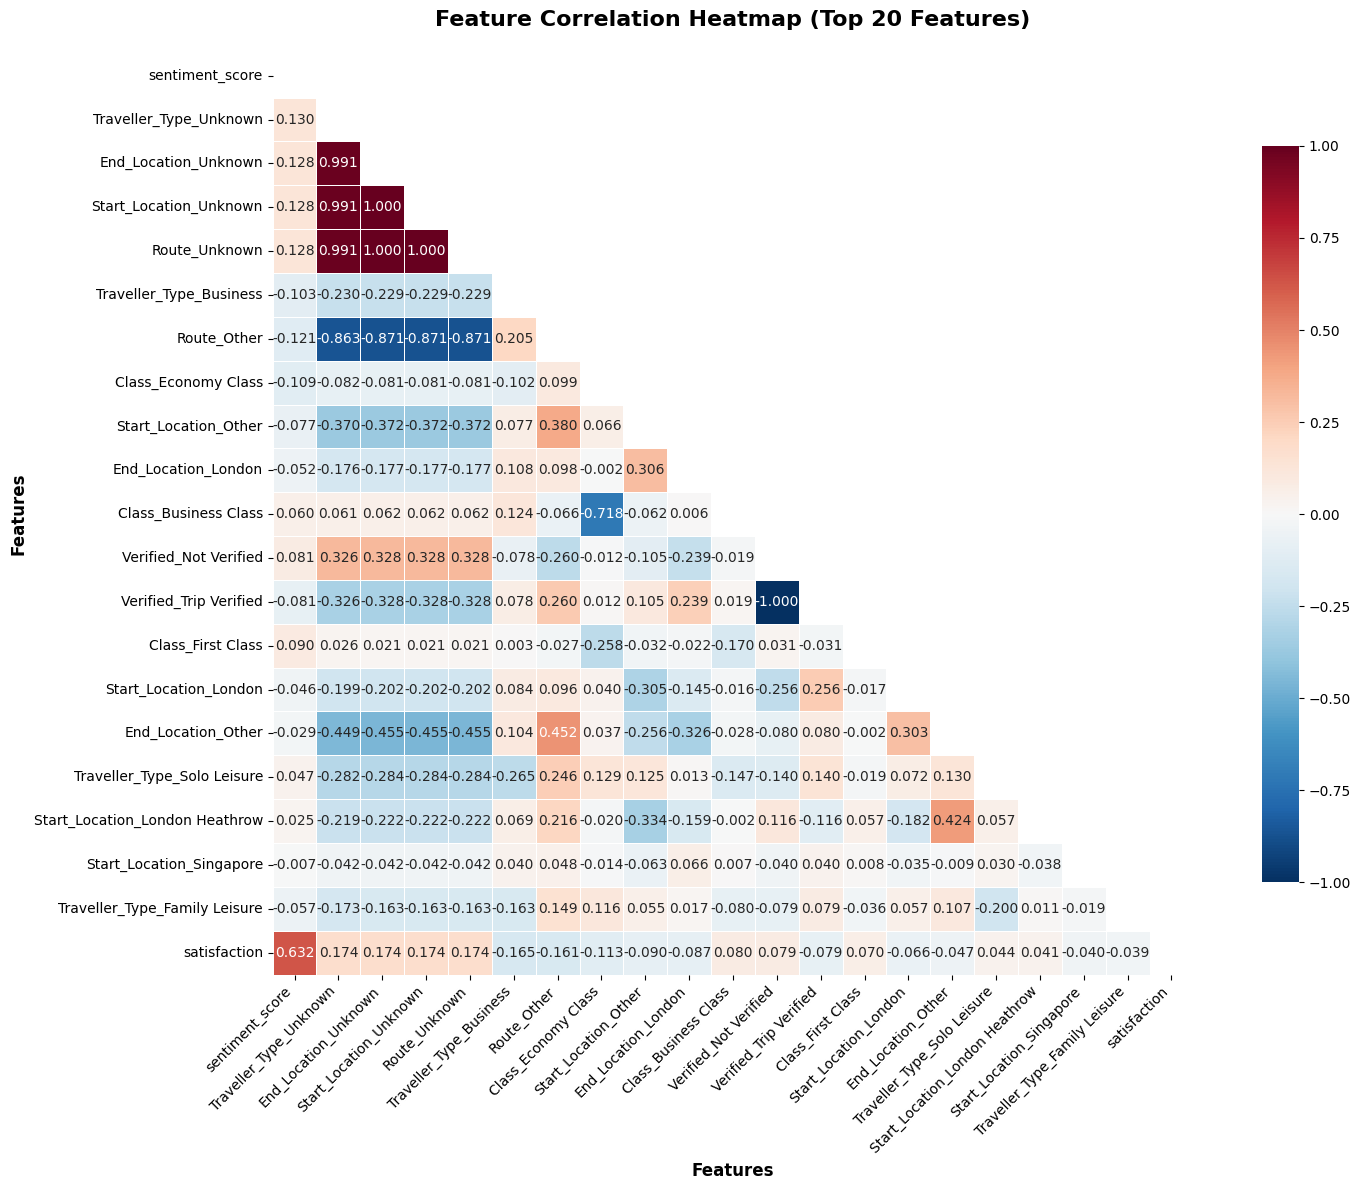


=== FEATURE IMPORTANCE RANKING (from Heatmap Analysis) ===
Top 15 Most Important Features:
 1. sentiment_score                          | Correlation: 0.6320 | Importance: HIGH
 2. Traveller_Type_Unknown                   | Correlation: 0.1739 | Importance: HIGH
 3. End_Location_Unknown                     | Correlation: 0.1735 | Importance: HIGH
 4. Start_Location_Unknown                   | Correlation: 0.1735 | Importance: HIGH
 5. Route_Unknown                            | Correlation: 0.1735 | Importance: HIGH
 6. Traveller_Type_Business                  | Correlation: 0.1647 | Importance: HIGH
 7. Route_Other                              | Correlation: 0.1611 | Importance: HIGH
 8. Class_Economy Class                      | Correlation: 0.1129 | Importance: HIGH
 9. Start_Location_Other                     | Correlation: 0.0901 | Importance: MEDIUM
10. End_Location_London                      | Correlation: 0.0868 | Importance: MEDIUM
11. Class_Business Class                    

In [434]:
# Method 3: Feature Importance Heatmap Analysis
print("=== METHOD 2: FEATURE IMPORTANCE HEATMAP ===")

# Create correlation matrix for top features
top_features = correlations.head(20).index.tolist()  # Top 20 features
correlation_matrix = df_final[top_features + ['satisfaction']].corr()

# Create the heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8},
            linewidths=0.5)

plt.title('Feature Correlation Heatmap (Top 20 Features)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature importance ranking from heatmap analysis
print("\n=== FEATURE IMPORTANCE RANKING (from Heatmap Analysis) ===")
print("Top 15 Most Important Features:")
for i, (feature, corr) in enumerate(correlations.head(15).items(), 1):
    importance_level = "HIGH" if corr > 0.1 else "MEDIUM" if corr > 0.05 else "LOW"
    print(f"{i:2d}. {feature:<40} | Correlation: {corr:.4f} | Importance: {importance_level}")

# Identify feature clusters from heatmap
print(f"\n=== FEATURE CLUSTERS ANALYSIS ===")
print("Based on correlation patterns in the heatmap:")

# Group features by correlation strength with target
high_corr_features = correlations[correlations > 0.1].index.tolist()
medium_corr_features = correlations[(correlations > 0.05) & (correlations <= 0.1)].index.tolist()
low_corr_features = correlations[correlations <= 0.05].index.tolist()

print(f"• HIGH IMPORTANCE (correlation > 0.1): {len(high_corr_features)} features")
for feature in high_corr_features:
    print(f"  - {feature}")

print(f"\n• MEDIUM IMPORTANCE (0.05 < correlation ≤ 0.1): {len(medium_corr_features)} features")
for feature in medium_corr_features[:10]:  # Show first 10
    print(f"  - {feature}")
if len(medium_corr_features) > 10:
    print(f"  ... and {len(medium_corr_features) - 10} more")

print(f"\n• LOW IMPORTANCE (correlation ≤ 0.05): {len(low_corr_features)} features")
print(f"  (Consider removing these features for model efficiency)")

# Summary recommendations
print(f"\n=== HEATMAP ANALYSIS SUMMARY ===")
print(f"• Total features analyzed: {len(correlation_matrix.columns) - 1}")
print(f"• High importance features: {len(high_corr_features)}")
print(f"• Medium importance features: {len(medium_corr_features)}")
print(f"• Low importance features: {len(low_corr_features)}")
print(f"• Recommended for modeling: {len(high_corr_features + medium_corr_features)} features")
print(f"• Features to consider removing: {len(low_corr_features)} features")

print(f"\n=== METHOD 3 COMPLETE ===")


=== FEATURE IMPORTANCE ANALYSIS (MODEL-BASED) ===
1. Training a RandomForest model to evaluate feature importance...
Model training complete.

2. Extracting and ranking feature importances...

🏆 Top 20 Most Important Features:
                       feature  importance
               sentiment_score    0.756249
       Traveller_Type_Business    0.018102
           Class_Economy Class    0.012094
   Traveller_Type_Solo Leisure    0.011448
 Traveller_Type_Couple Leisure    0.011297
          Class_Business Class    0.010771
          Start_Location_Other    0.009614
        Verified_Trip Verified    0.009522
            End_Location_Other    0.009502
Start_Location_London Heathrow    0.008893
         Verified_Not Verified    0.008741
 Traveller_Type_Family Leisure    0.008395
  End_Location_London Heathrow    0.008085
           End_Location_London    0.008059
         Class_Premium Economy    0.007715
                   Route_Other    0.007434
             Class_First Class    0.007068

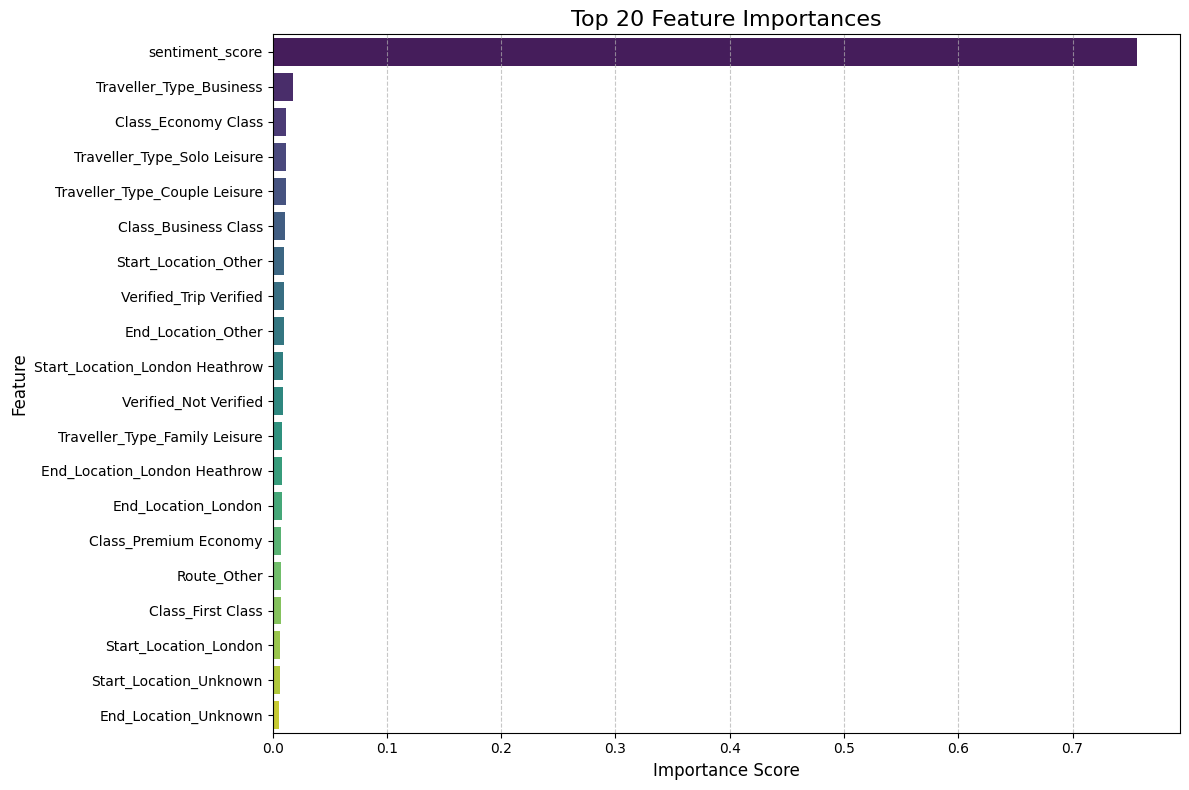


5. Conclusion:
This analysis gives a strong indication of which features the model finds most predictive.
For the final predictive model, we will proceed with the full feature set, as this allows the model to capture all available information.
The insights gained here will be compared with the SHAP and LIME explanations later on. 🧠

=== FEATURE ANALYSIS COMPLETE ===


In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

print("=== FEATURE IMPORTANCE ANALYSIS (MODEL-BASED) ===")

# 1. TRAIN A PRELIMINARY MODEL FOR IMPORTANCE RANKING
print("1. Training a RandomForest model to evaluate feature importance...")
# A RandomForest is great for this because it's robust and calculates importance internally.
forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
forest.fit(X, y)
print("Model training complete.")

# 2. EXTRACT AND RANK FEATURE IMPORTANCES
print("\n2. Extracting and ranking feature importances...")
importances = forest.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

# 3. DISPLAY TOP FEATURES
N_TOP_FEATURES = 20
print(f"\n🏆 Top {N_TOP_FEATURES} Most Important Features:")
print(feature_importance_df.head(N_TOP_FEATURES).to_string(index=False))

# 4. VISUALIZE FEATURE IMPORTANCE
print(f"\n4. Visualizing the top {N_TOP_FEATURES} features...")

plt.figure(figsize=(12, 8))
sns.barplot(
    x='importance',
    y='feature',
    data=feature_importance_df.head(N_TOP_FEATURES),
    palette='viridis'
)
plt.title(f'Top {N_TOP_FEATURES} Feature Importances', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. CONCLUSION AND NEXT STEPS
print("\n5. Conclusion:")
print("This analysis gives a strong indication of which features the model finds most predictive.")
print("For the final predictive model, we will proceed with the full feature set, as this allows the model to capture all available information.")
print("The insights gained here will be compared with the SHAP and LIME explanations later on. 🧠")

print("\n=== FEATURE ANALYSIS COMPLETE ===")

## MODEL 1: LOGISTIC REGRESSION

In [436]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# For clarity, let's explicitly define X and y from your provided variables
X = X_scaled_df
y = y

print(f"Starting modeling with {X.shape[1]} features.")

## 1. Setup and Data Splitting

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData split:")
print(f"• X_train shape: {X_train.shape}")
print(f"• X_test shape: {X_test.shape}")
print(f"• y_train shape: {y_train.shape}")
print(f"• y_test shape: {y_test.shape}")

## 2. Model 1: Statistical Model (Logistic Regression)

print("\n=== MODEL 1: LOGISTIC REGRESSION ===")

# Initialize and train the model
# max_iter=1000 to ensure convergence with many features
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log, target_names=['Dissatisfied', 'Satisfied']))

X_train_XAI = X_train
y_train_XAI = y_train
X_test_XAI = X_test
y_test_XAI = y_test


Starting modeling with 62 features.

Data split:
• X_train shape: (2800, 62)
• X_test shape: (701, 62)
• y_train shape: (2800,)
• y_test shape: (701,)

=== MODEL 1: LOGISTIC REGRESSION ===
Accuracy: 0.8017

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

Dissatisfied       0.84      0.76      0.80       367
   Satisfied       0.76      0.84      0.80       334

    accuracy                           0.80       701
   macro avg       0.80      0.80      0.80       701
weighted avg       0.81      0.80      0.80       701



=== ENHANCED ANALYSIS FOR MODEL 1 (LOGISTIC REGRESSION) ===


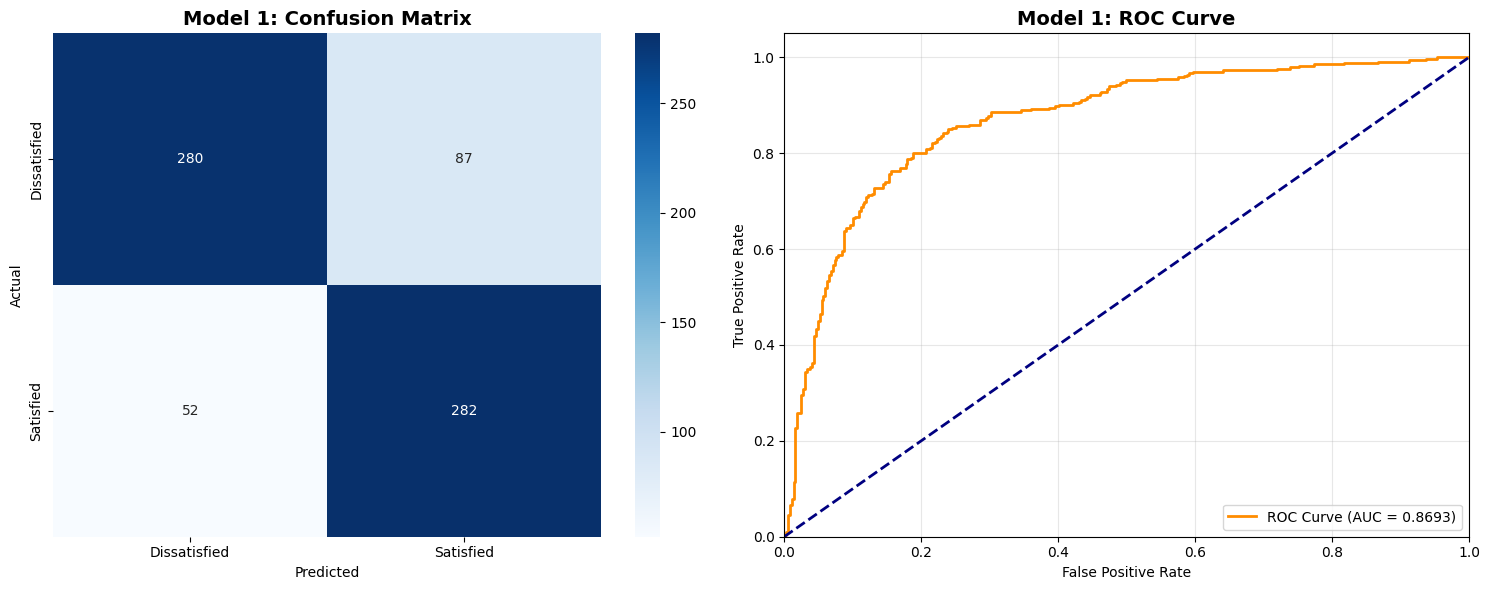


=== COMPREHENSIVE METRICS FOR MODEL 1 ===
Test Accuracy: 0.8017
ROC AUC Score: 0.8693
Precision: 0.7642
Recall: 0.8443
F1-Score: 0.8023

Confusion Matrix Details:
True Negatives: 280
False Positives: 87
False Negatives: 52
True Positives: 282
Specificity: 0.7629
Sensitivity: 0.8443

=== MODEL 1 ANALYSIS COMPLETE ===


In [437]:
# ENHANCED METRICS AND VISUALIZATIONS FOR MODEL 1
print("=== ENHANCED ANALYSIS FOR MODEL 1 (LOGISTIC REGRESSION) ===")

from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get prediction probabilities for Model 1
y_pred_proba_log = log_model.predict_proba(X_test)[:, 1]

# 1. Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Model 1: Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['Dissatisfied', 'Satisfied'])
axes[0].set_yticklabels(['Dissatisfied', 'Satisfied'])

# 2. ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

axes[1].plot(fpr_log, tpr_log, color='darkorange', lw=2, 
               label=f'ROC Curve (AUC = {roc_auc_log:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Model 1: ROC Curve', fontsize=14, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print comprehensive metrics for Model 1
print("\n=== COMPREHENSIVE METRICS FOR MODEL 1 ===")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"ROC AUC Score: {roc_auc_log:.4f}")

# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print(f"Precision: {precision_log:.4f}")
print(f"Recall: {recall_log:.4f}")
print(f"F1-Score: {f1_log:.4f}")

# Confusion Matrix Details
tn, fp, fn, tp = cm_log.ravel()
print(f"\nConfusion Matrix Details:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Specificity: {tn/(tn+fp):.4f}")
print(f"Sensitivity: {tp/(tp+fn):.4f}")

print(f"\n=== MODEL 1 ANALYSIS COMPLETE ===")


## MODEL 2: SHALLOW NEURAL NETWORK (FFNN)

In [438]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# 5. MODEL 2: SHALLOW FEED-FORWARD NEURAL NETWORK (FFNN)
print("\n=== 5. TRAINING MODEL 2: SHALLOW NEURAL NETWORK (FFNN) ===")
# Define the model architecture
ffnn_model = Sequential([
    # Input layer: Dense layer with 32 neurons, 'relu' activation.
    # input_dim must match the number of features.
    Dense(32, activation='relu', input_dim=X_train.shape[1], name='Input_Layer'),
    # Dropout layer: randomly sets 30% of input units to 0 to prevent overfitting.
    Dropout(0.3, name='Dropout_Layer'),
    # Hidden layer: Another dense layer to learn more complex patterns.
    Dense(16, activation='relu', name='Hidden_Layer_1'),
    # Output layer: A single neuron with 'sigmoid' activation for binary (0 or 1) output.
    Dense(1, activation='sigmoid', name='Output_Layer')
])
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1)
# Compile the model with an optimizer, loss function, and metrics
ffnn_model.compile(optimizer='adam',
 loss='binary_crossentropy',
  metrics=['accuracy'],
)
print("\nModel Summary:")
ffnn_model.summary()

# Train the model
print("\nTraining the FFNN...")
history = ffnn_model.fit(
    X_train,
    y_train,
    epochs=50,          # Number of passes through the entire training dataset
    batch_size=32,      # Number of samples processed before the model is updated
    validation_data=(X_test, y_test),
        callbacks=[early_stopping],

    verbose=1         # Set to 1 to see live training progress per epoch
)
print("Training complete.")

# Evaluate the model
print("\n--- Evaluation (FFNN) ---")
# Predict probabilities and convert to binary classes (0 or 1) using a 0.5 threshold
y_pred_ffnn = (ffnn_model.predict(X_test) > 0.5).astype("int32")

print(f"Accuracy: {accuracy_score(y_test, y_pred_ffnn):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ffnn, target_names=['Dissatisfied', 'Satisfied']))

print("\n=== MODELING PROCESS COMPLETE ===")




=== 5. TRAINING MODEL 2: SHALLOW NEURAL NETWORK (FFNN) ===

Model Summary:


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)             │ (None, 32)             │         2,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer (Dropout)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)


Training the FFNN...
Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6104 - loss: 0.6921 - val_accuracy: 0.6990 - val_loss: 0.6142
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.6957 - loss: 0.6100 - val_accuracy: 0.7803 - val_loss: 0.5430
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.7550 - loss: 0.5479 - val_accuracy: 0.8060 - val_loss: 0.4934
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.7693 - loss: 0.5065 - val_accuracy: 0.8160 - val_loss: 0.4702
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.7843 - loss: 0.4877 - val_accuracy: 0.8031 - val_loss: 0.4631
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.7821 - loss: 0.4908 - val_accuracy: 0.8017 - val_loss: 0.4631
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.7886 - loss: 0.4781 - val_accuracy: 0.8031 - val_loss: 0.4578
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.7996 - loss: 0.465

=== TRAINING AND VALIDATION PLOTS FOR MODEL 2 ===

=== TRAINING SUMMARY FOR MODEL 2 ===
Total Epochs Trained: 25
Early Stopping Triggered: Yes
Best Training Accuracy: 0.8139 (Epoch 22)
Best Validation Accuracy: 0.8160 (Epoch 4)
Best Training Loss: 0.4253 (Epoch 24)
Best Validation Loss: 0.4521 (Epoch 10)
Final Test Accuracy: 0.8117


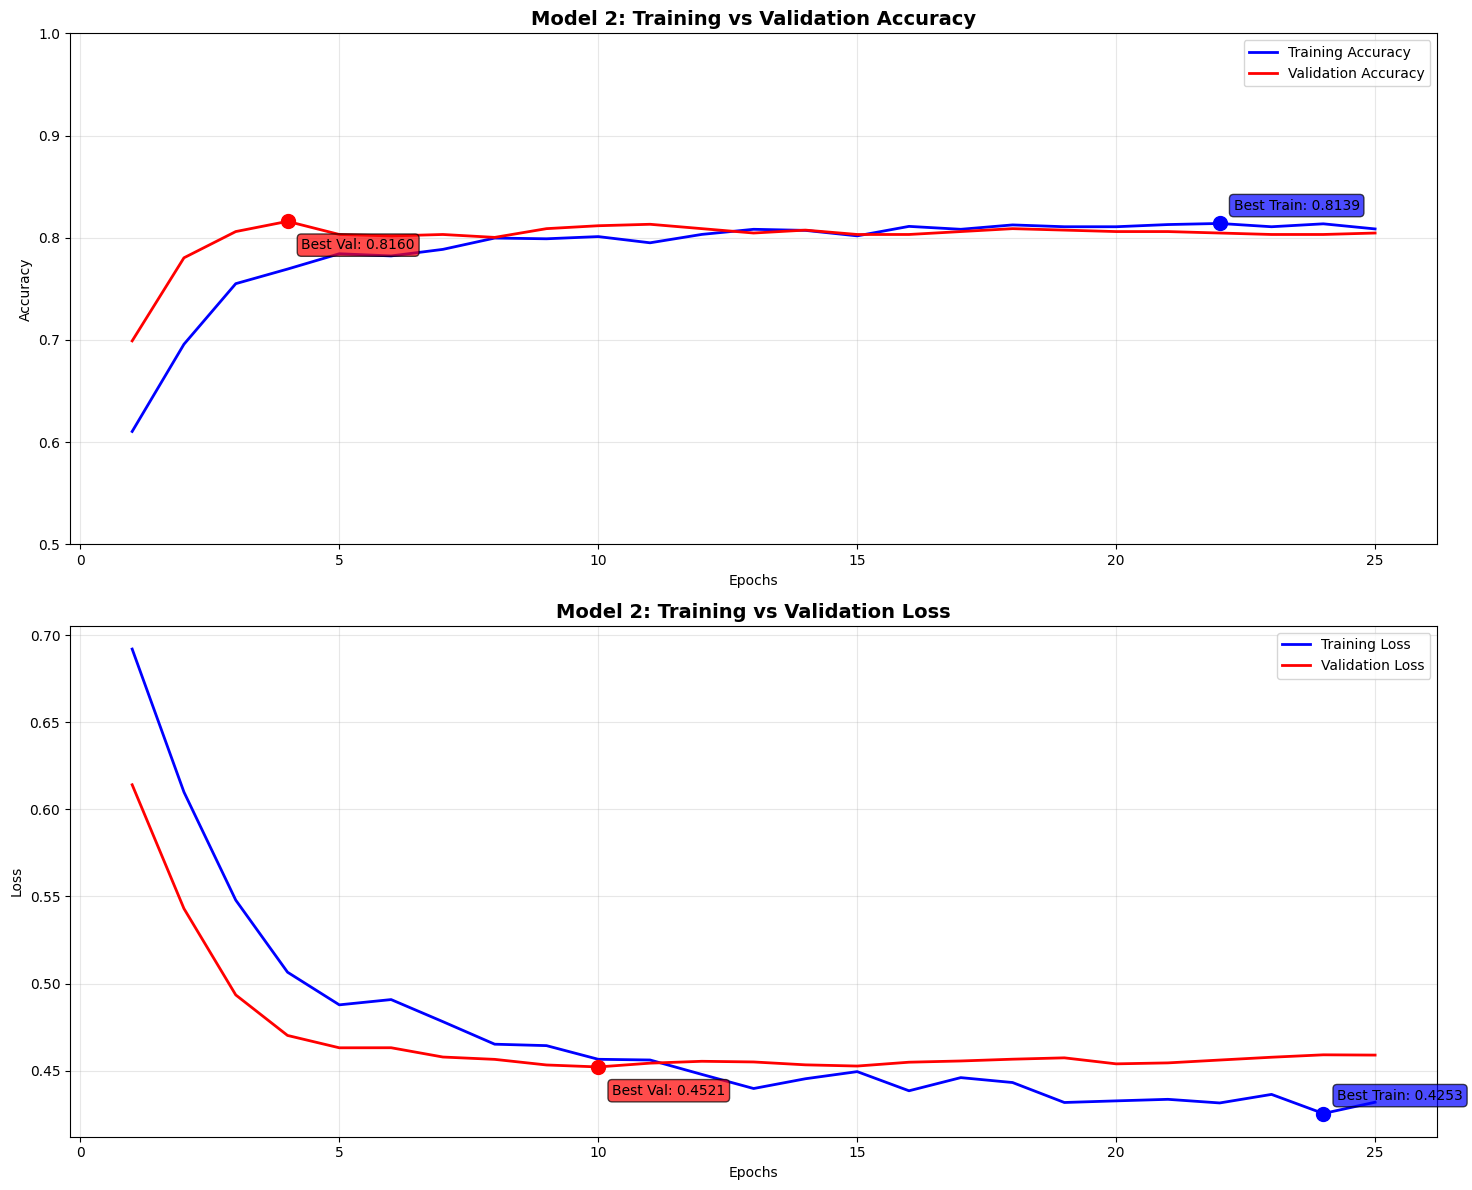

In [439]:
# TRAINING AND VALIDATION PLOTS FOR MODEL 2
print("=== TRAINING AND VALIDATION PLOTS FOR MODEL 2 ===")

# Create comprehensive training plots for Model 2
fig, axes = plt.subplots(2, figsize=(15, 12))

# 1. Training and Validation Accuracy for Model 2
epochs = range(1, len(history.history['accuracy']) + 1)
axes[0].plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
axes[0].plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model 2: Training vs Validation Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(0.5, 1.0)

# Add best accuracy markers for Model 2
best_train_acc_2 = max(history.history['accuracy'])
best_val_acc_2 = max(history.history['val_accuracy'])
best_train_epoch_2 = history.history['accuracy'].index(best_train_acc_2) + 1
best_val_epoch_2 = history.history['val_accuracy'].index(best_val_acc_2) + 1

axes[0].scatter(best_train_epoch_2, best_train_acc_2, color='blue', s=100, zorder=5)
axes[0].scatter(best_val_epoch_2, best_val_acc_2, color='red', s=100, zorder=5)
axes[0].annotate(f'Best Train: {best_train_acc_2:.4f}', 
                   xy=(best_train_epoch_2, best_train_acc_2), 
                   xytext=(10, 10), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='blue', alpha=0.7))
axes[0].annotate(f'Best Val: {best_val_acc_2:.4f}', 
                   xy=(best_val_epoch_2, best_val_acc_2), 
                   xytext=(10, -20), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.7))

# 2. Training and Validation Loss for Model 2
axes[1].plot(epochs, history.history['loss'], 'b-', label='Training Loss', linewidth=2)
axes[1].plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
axes[1].set_title('Model 2: Training vs Validation Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Add best loss markers for Model 2
best_train_loss_2 = min(history.history['loss'])
best_val_loss_2 = min(history.history['val_loss'])
best_train_loss_epoch_2 = history.history['loss'].index(best_train_loss_2) + 1
best_val_loss_epoch_2 = history.history['val_loss'].index(best_val_loss_2) + 1

axes[1].scatter(best_train_loss_epoch_2, best_train_loss_2, color='blue', s=100, zorder=5)
axes[1].scatter(best_val_loss_epoch_2, best_val_loss_2, color='red', s=100, zorder=5)
axes[1].annotate(f'Best Train: {best_train_loss_2:.4f}', 
                   xy=(best_train_loss_epoch_2, best_train_loss_2), 
                   xytext=(10, 10), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='blue', alpha=0.7))
axes[1].annotate(f'Best Val: {best_val_loss_2:.4f}', 
                   xy=(best_val_loss_epoch_2, best_val_loss_2), 
                   xytext=(10, -20), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.7))

# Print training summary for Model 2
print("\n=== TRAINING SUMMARY FOR MODEL 2 ===")
print(f"Total Epochs Trained: {len(history.history['loss'])}")
print(f"Early Stopping Triggered: {'Yes' if len(history.history['loss']) < 50 else 'No'}")
print(f"Best Training Accuracy: {best_train_acc_2:.4f} (Epoch {best_train_epoch_2})")
print(f"Best Validation Accuracy: {best_val_acc_2:.4f} (Epoch {best_val_epoch_2})")
print(f"Best Training Loss: {best_train_loss_2:.4f} (Epoch {best_train_loss_epoch_2})")
print(f"Best Validation Loss: {best_val_loss_2:.4f} (Epoch {best_val_loss_epoch_2})")
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred_ffnn):.4f}")

plt.tight_layout()
plt.show()


## MODEL More Complex FNN with more Layers

In [440]:
# MODEL 3: FFNN WITH EARLY STOPPING AND MORE EPOCHS
print("=== MODEL 3: FFNN WITH EARLY STOPPING ===")


# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Prepare data for training with validation split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Further split training data into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Build Model 3: Enhanced FFNN with Early Stopping
from tensorflow.keras.regularizers import l2

model3 = Sequential([

    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])
# Compile the model
model3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)


print("Model 3 Architecture:")
model3.summary()

# Train the model with callbacks
print("\n=== TRAINING MODEL 3 ===")
history3 = model3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # More epochs
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

print(f"\nTraining completed after {len(history3.history['loss'])} epochs")
print(f"Best validation accuracy: {max(history3.history['val_accuracy']):.4f}")
print(f"Best validation loss: {min(history3.history['val_loss']):.4f}")

# Evaluate on test set
print("\n=== EVALUATION (Model 3) ===")
test_loss, test_accuracy = model3.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred_proba = model3.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Calculate metrics
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Dissatisfied', 'Satisfied']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


=== MODEL 3: FFNN WITH EARLY STOPPING ===
Training set size: 2240
Validation set size: 560
Test set size: 701
Model 3 Architecture:


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 128)            │         8,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,841 (77.50 KB)

 Trainable params: 19,393 (75.75 KB)

 Non-trainable params: 448 (1.75 KB)


=== TRAINING MODEL 3 ===
Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5741 - loss: 0.7318 - val_accuracy: 0.7000 - val_loss: 0.6351
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6835 - loss: 0.6070 - val_accuracy: 0.7607 - val_loss: 0.5647
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7433 - loss: 0.5403 - val_accuracy: 0.7732 - val_loss: 0.5080
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7594 - loss: 0.5194 - val_accuracy: 0.7839 - val_loss: 0.4926
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7710 - loss: 0.4982 - val_accuracy: 0.7929 - val_loss: 0.4814
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7759 - loss: 0.4921 - val_accuracy: 0.7857 - val_loss: 0.4829
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7848 - loss: 0.4835 - val_accuracy: 0.7929 - val_loss: 0.4787
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8009 - loss: 0.4569 

## TRAINING AND VALIDATION PLOTS

In [441]:
# TRAINING AND VALIDATION PLOTS FOR MODEL 3
print("=== TRAINING AND VALIDATION PLOTS ===")

# Create comprehensive training plots
fig, axes = plt.subplots(2, figsize=(15, 12))

# 1. Training and Validation Accuracy
epochs = range(1, len(history3.history['accuracy']) + 1)
axes[0].plot(epochs, history3.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
axes[0].plot(epochs, history3.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model 3: Training vs Validation Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(0.5, 1.0)

# Add best accuracy markers
best_train_acc = max(history3.history['accuracy'])
best_val_acc = max(history3.history['val_accuracy'])
best_train_epoch = history3.history['accuracy'].index(best_train_acc) + 1
best_val_epoch = history3.history['val_accuracy'].index(best_val_acc) + 1

axes[0].scatter(best_train_epoch, best_train_acc, color='blue', s=100, zorder=5)
axes[0].scatter(best_val_epoch, best_val_acc, color='red', s=100, zorder=5)
axes[0].annotate(f'Best Train: {best_train_acc:.4f}', 
                   xy=(best_train_epoch, best_train_acc), 
                   xytext=(10, 10), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='blue', alpha=0.7))
axes[0].annotate(f'Best Val: {best_val_acc:.4f}', 
                   xy=(best_val_epoch, best_val_acc), 
                   xytext=(10, -20), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.7))

# 2. Training and Validation Loss
axes[1].plot(epochs, history3.history['loss'], 'b-', label='Training Loss', linewidth=2)
axes[1].plot(epochs, history3.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
axes[1].set_title('Model 3: Training vs Validation Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Add best loss markers
best_train_loss = min(history3.history['loss'])
best_val_loss = min(history3.history['val_loss'])
best_train_loss_epoch = history3.history['loss'].index(best_train_loss) + 1
best_val_loss_epoch = history3.history['val_loss'].index(best_val_loss) + 1

axes[1].scatter(best_train_loss_epoch, best_train_loss, color='blue', s=100, zorder=5)
axes[1].scatter(best_val_loss_epoch, best_val_loss, color='red', s=100, zorder=5)
axes[1].annotate(f'Best Train: {best_train_loss:.4f}', 
                   xy=(best_train_loss_epoch, best_train_loss), 
                   xytext=(10, 10), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='blue', alpha=0.7))
axes[1].annotate(f'Best Val: {best_val_loss:.4f}', 
                   xy=(best_val_loss_epoch, best_val_loss), 
                   xytext=(10, -20), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.7))

# Print training summary
print("\n=== TRAINING SUMMARY ===")
print(f"Total Epochs Trained: {len(history3.history['loss'])}")
print(f"Early Stopping Triggered: {'Yes' if len(history3.history['loss']) < 100 else 'No'}")
print(f"Best Training Accuracy: {best_train_acc:.4f} (Epoch {best_train_epoch})")
print(f"Best Validation Accuracy: {best_val_acc:.4f} (Epoch {best_val_epoch})")
print(f"Best Training Loss: {best_train_loss:.4f} (Epoch {best_train_loss_epoch})")
print(f"Best Validation Loss: {best_val_loss:.4f} (Epoch {best_val_loss_epoch})")
print(f"Final Test Accuracy: {test_accuracy:.4f}")



=== TRAINING AND VALIDATION PLOTS ===

=== TRAINING SUMMARY ===
Total Epochs Trained: 27
Early Stopping Triggered: Yes
Best Training Accuracy: 0.8272 (Epoch 23)
Best Validation Accuracy: 0.8018 (Epoch 16)
Best Training Loss: 0.3839 (Epoch 25)
Best Validation Loss: 0.4736 (Epoch 12)
Final Test Accuracy: 0.7932


=== UNIFIED COMPARISON OF ALL THREE MODELS ===
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step

=== COMPREHENSIVE MODEL COMPARISON TABLE ===
                        Model  Test Accuracy  ROC AUC   PR AUC  Precision   Recall  F1-Score Best Train Accuracy Best Val Accuracy Total Epochs Early Stopping
Model 1 (Logistic Regression)       0.801712 0.869348 0.832765   0.764228 0.844311  0.802276                 N/A               N/A          N/A            N/A
         Model 2 (Shallow NN)       0.811698 0.870327 0.852609   0.782123 0.838323  0.809249              0.8139            0.8160           25            Yes
            Model 3 (Deep NN)       0.793153 0.858874 0.823749   0.760331 0.826347  0.791966              0.8272            0.8018           27            Yes


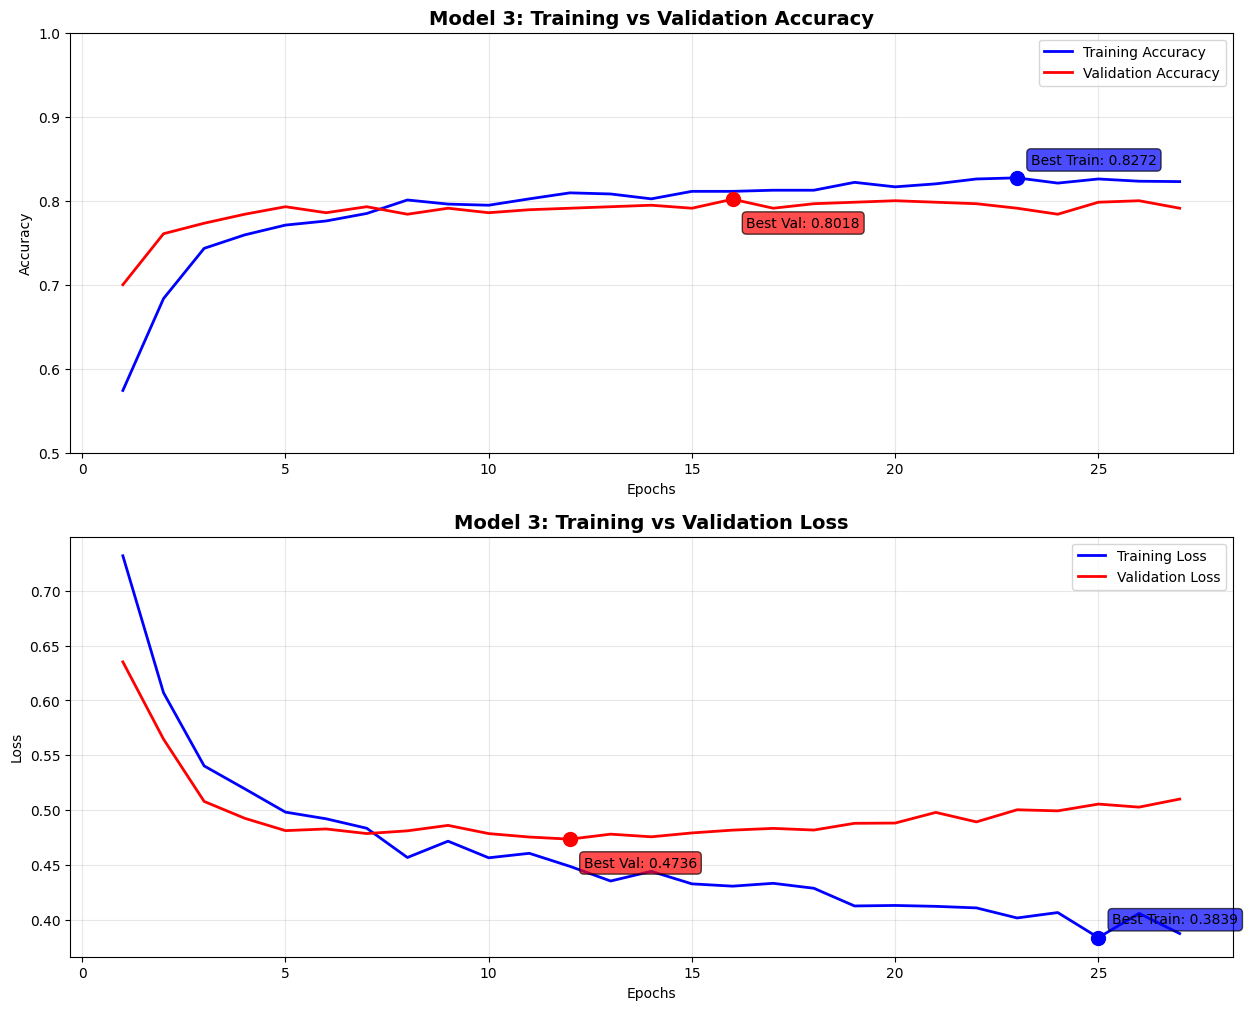

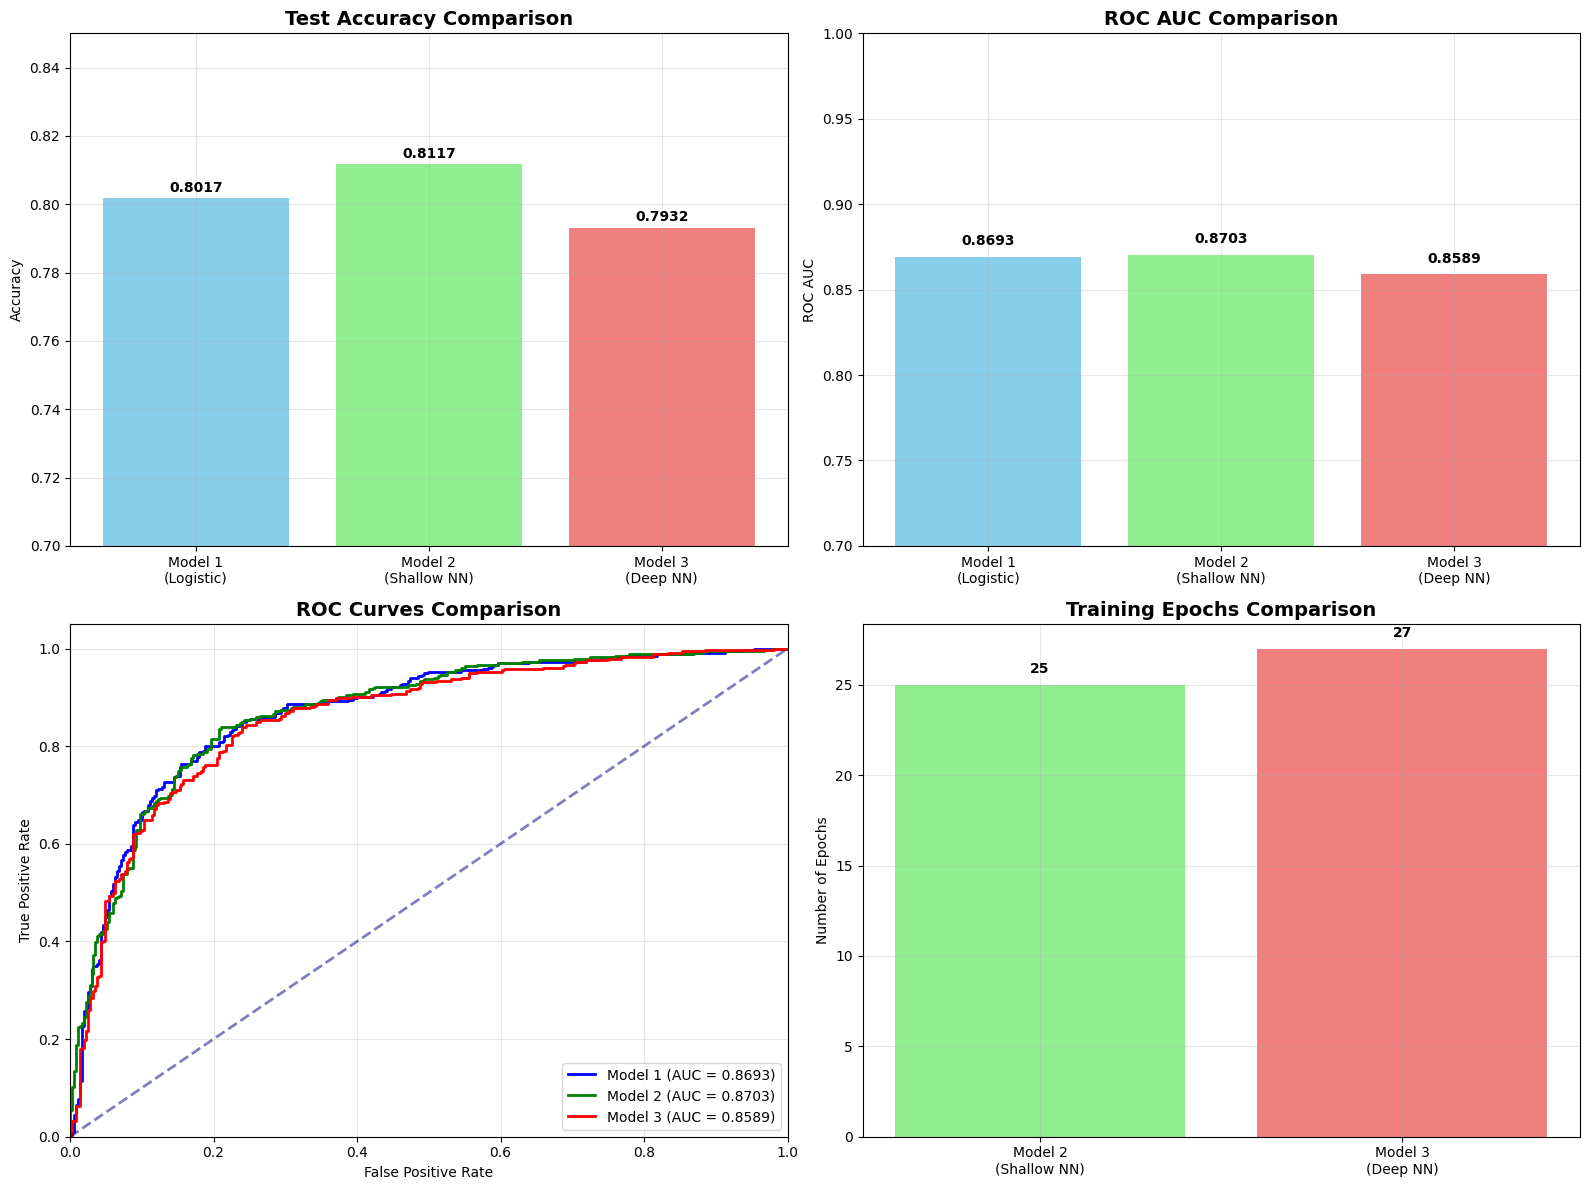


=== BEST PERFORMING MODEL ANALYSIS ===
🏆 Best Test Accuracy: Model 2 (Shallow NN) (0.8117)
🏆 Best ROC AUC: Model 2 (Shallow NN) (0.8703)
🏆 Best F1-Score: Model 2 (Shallow NN) (0.8092)

=== SUMMARY AND RECOMMENDATIONS ===
• Model 1 (Logistic Regression): Best for interpretability and fast inference
• Model 2 (Shallow NN): Good balance of performance and complexity
• Model 3 (Deep NN): Most complex but may be overfitting based on training vs validation gap

=== UNIFIED COMPARISON COMPLETE ===


In [442]:
# UNIFIED COMPARISON OF ALL THREE MODELS
print("=== UNIFIED COMPARISON OF ALL THREE MODELS ===")

import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Calculate additional metrics for Model 2 and Model 3
# Model 2 metrics
y_pred_proba_ffnn = ffnn_model.predict(X_test).flatten()
fpr_ffnn, tpr_ffnn, _ = roc_curve(y_test, y_pred_proba_ffnn)
roc_auc_ffnn = auc(fpr_ffnn, tpr_ffnn)
precision_ffnn, recall_ffnn, _ = precision_recall_curve(y_test, y_pred_proba_ffnn)
pr_auc_ffnn = auc(recall_ffnn, precision_ffnn)

# Model 3 metrics
y_pred_proba_model3 = model3.predict(X_test).flatten()
fpr_model3, tpr_model3, _ = roc_curve(y_test, y_pred_proba_model3)
roc_auc_model3 = auc(fpr_model3, tpr_model3)
precision_model3, recall_model3, _ = precision_recall_curve(y_test, y_pred_proba_model3)
pr_auc_model3 = auc(recall_model3, precision_model3)

# Create comprehensive comparison table
comparison_data = {
    'Model': ['Model 1 (Logistic Regression)', 'Model 2 (Shallow NN)', 'Model 3 (Deep NN)'],
    'Test Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_ffnn),
        test_accuracy
    ],
    'ROC AUC': [roc_auc_log, roc_auc_ffnn, roc_auc_model3],
    'PR AUC': [pr_auc_log, pr_auc_ffnn, pr_auc_model3],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_ffnn),
        precision_score(y_test, y_pred)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_ffnn),
        recall_score(y_test, y_pred)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_ffnn),
        f1_score(y_test, y_pred)
    ],
    'Best Train Accuracy': ['N/A', f"{best_train_acc_2:.4f}", f"{best_train_acc:.4f}"],
    'Best Val Accuracy': ['N/A', f"{best_val_acc_2:.4f}", f"{best_val_acc:.4f}"],
    'Total Epochs': ['N/A', len(history.history['loss']), len(history3.history['loss'])],
    'Early Stopping': ['N/A', 'Yes' if len(history.history['loss']) < 50 else 'No', 
                      'Yes' if len(history3.history['loss']) < 100 else 'No']
}

comparison_df = pd.DataFrame(comparison_data)

print("\n=== COMPREHENSIVE MODEL COMPARISON TABLE ===")
print(comparison_df.to_string(index=False))

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Test Accuracy Comparison
models = ['Model 1\n(Logistic)', 'Model 2\n(Shallow NN)', 'Model 3\n(Deep NN)']
accuracies = [accuracy_score(y_test, y_pred_log), 
              accuracy_score(y_test, y_pred_ffnn), 
              test_accuracy]

bars = axes[0,0].bar(models, accuracies, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0,0].set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_ylim(0.7, 0.85)
axes[0,0].grid(True, alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
                   f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

# 2. ROC AUC Comparison
roc_aucs = [roc_auc_log, roc_auc_ffnn, roc_auc_model3]
bars = axes[0,1].bar(models, roc_aucs, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0,1].set_title('ROC AUC Comparison', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('ROC AUC')
axes[0,1].set_ylim(0.7, 1.0)
axes[0,1].grid(True, alpha=0.3)

for bar, auc_val in zip(bars, roc_aucs):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                   f'{auc_val:.4f}', ha='center', va='bottom', fontweight='bold')

# 3. ROC Curves Comparison
axes[1,0].plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Model 1 (AUC = {roc_auc_log:.4f})')
axes[1,0].plot(fpr_ffnn, tpr_ffnn, color='green', lw=2, label=f'Model 2 (AUC = {roc_auc_ffnn:.4f})')
axes[1,0].plot(fpr_model3, tpr_model3, color='red', lw=2, label=f'Model 3 (AUC = {roc_auc_model3:.4f})')
axes[1,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
axes[1,0].set_xlim([0.0, 1.0])
axes[1,0].set_ylim([0.0, 1.05])
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
axes[1,0].legend(loc="lower right")
axes[1,0].grid(True, alpha=0.3)

# 4. Training Epochs Comparison (for neural networks)
nn_models = ['Model 2\n(Shallow NN)', 'Model 3\n(Deep NN)']
epochs = [len(history.history['loss']), len(history3.history['loss'])]
bars = axes[1,1].bar(nn_models, epochs, color=['lightgreen', 'lightcoral'])
axes[1,1].set_title('Training Epochs Comparison', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Number of Epochs')
axes[1,1].grid(True, alpha=0.3)

for bar, epoch in zip(bars, epochs):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                   f'{epoch}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Best performing model analysis
print("\n=== BEST PERFORMING MODEL ANALYSIS ===")
best_accuracy_model = comparison_df.loc[comparison_df['Test Accuracy'].idxmax(), 'Model']
best_roc_auc_model = comparison_df.loc[comparison_df['ROC AUC'].idxmax(), 'Model']
best_f1_model = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']

print(f"🏆 Best Test Accuracy: {best_accuracy_model} ({comparison_df['Test Accuracy'].max():.4f})")
print(f"🏆 Best ROC AUC: {best_roc_auc_model} ({comparison_df['ROC AUC'].max():.4f})")
print(f"🏆 Best F1-Score: {best_f1_model} ({comparison_df['F1-Score'].max():.4f})")

# Summary recommendations
print(f"\n=== SUMMARY AND RECOMMENDATIONS ===")
print(f"• Model 1 (Logistic Regression): Best for interpretability and fast inference")
print(f"• Model 2 (Shallow NN): Good balance of performance and complexity")
print(f"• Model 3 (Deep NN): Most complex but may be overfitting based on training vs validation gap")

print(f"\n=== UNIFIED COMPARISON COMPLETE ===")


In [443]:
# INFERENCE FUNCTION FOR ALL THREE MODELS
print("=== INFERENCE FUNCTION IMPLEMENTATION ===")

import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_sample(sample_data, scaler, X_features, top_categories_dict=None):
    """
    Preprocess a single sample following the exact pipeline used during training
    
    Parameters:
    - sample_data: DataFrame with one row containing the sample
    - scaler: Trained StandardScaler object
    - X_features: List of all encoded feature names from training
    - top_categories_dict: Dictionary with top categories for high-cardinality features
    
    Returns:
    - processed_sample: Preprocessed and scaled sample ready for prediction
    """
    
    # Create a copy to avoid modifying original data
    df_sample = sample_data.copy()
    
    # 1. Apply sentiment analysis (VADER) if not already present
    if 'sentiment_score' not in df_sample.columns:
        analyzer = SentimentIntensityAnalyzer()
        df_sample['sentiment_score'] = df_sample['Review_content'].apply(
            lambda x: analyzer.polarity_scores(str(x))['compound']
        )
    
    # 2. Select relevant features (same as training)
    relevant_features = ['Traveller_Type', 'Class', 'Route', 'Start_Location', 'End_Location', 'Verified', 'sentiment_score']
    
    # Ensure all required features exist
    for feature in relevant_features:
        if feature not in df_sample.columns:
            if feature == 'sentiment_score':
                df_sample[feature] = 0.0  # Default neutral sentiment
            else:
                df_sample[feature] = 'Unknown'
    
    # 3. Handle missing values
    for col in relevant_features:
        if df_sample[col].isnull().any():
            if df_sample[col].dtype == 'object':
                df_sample[col] = df_sample[col].fillna('Unknown')
            else:
                df_sample[col] = df_sample[col].fillna(0.0)
    
    # 4. Handle high-cardinality features (group rare categories)
    high_cardinality_features = ['Route', 'Start_Location', 'End_Location']
    
    for feature in high_cardinality_features:
        if feature in df_sample.columns:
            if top_categories_dict and feature in top_categories_dict:
                # Use the top categories from training
                top_categories = top_categories_dict[feature]
                df_sample[feature] = df_sample[feature].where(
                    df_sample[feature].isin(top_categories), 'Other'
                )
            else:
                # If no top categories provided, keep as is
                pass
    
    # 5. One-hot encoding for categorical features
    categorical_features = ['Traveller_Type', 'Class', 'Route', 'Start_Location', 'End_Location', 'Verified']
    
    # Create dummy variables
    df_encoded = pd.get_dummies(df_sample, columns=categorical_features, dummy_na=False)
    
    # 6. Ensure all expected columns exist (align with training features)
    for col in X_features:
        if col not in df_encoded.columns:
            df_encoded[col] = 0
    
    # Select only the features used in training
    df_encoded = df_encoded[X_features]
    
    # 7. Apply standard scaling
    sample_scaled = scaler.transform(df_encoded)
    
    return sample_scaled

print("✅ Preprocessing function created successfully!")


=== INFERENCE FUNCTION IMPLEMENTATION ===
✅ Preprocessing function created successfully!


In [444]:
def predict_satisfaction(sample_data, log_model, ffnn_model, model3, scaler, X_features, top_categories_dict=None):
    """
    Make predictions using all three models on a single sample
    
    Parameters:
    - sample_data: DataFrame with one row containing the sample
    - log_model: Trained Logistic Regression model
    - ffnn_model: Trained Shallow Neural Network model
    - model3: Trained Deep Neural Network model
    - scaler: Trained StandardScaler object
    - X_features: List of all encoded feature names from training
    - top_categories_dict: Dictionary with top categories for high-cardinality features
    
    Returns:
    - predictions: Dictionary with predictions and probabilities from all models
    """
    
    # Preprocess the sample
    processed_sample = preprocess_sample(sample_data, scaler, X_features, top_categories_dict)
    
    # Make predictions with all three models
    predictions = {}
    
    # Model 1: Logistic Regression
    lr_pred = log_model.predict(processed_sample)[0]
    lr_proba = log_model.predict_proba(processed_sample)[0]
    
    predictions['Model_1_Logistic'] = {
        'prediction': lr_pred,
        'probability': lr_proba[1],  # Probability of being satisfied
        'confidence': max(lr_proba[0], lr_proba[1])
    }
    
    # Model 2: Shallow Neural Network
    ffnn_pred_proba = ffnn_model.predict(processed_sample)[0][0]
    ffnn_pred = 1 if ffnn_pred_proba > 0.5 else 0
    
    predictions['Model_2_Shallow_NN'] = {
        'prediction': ffnn_pred,
        'probability': ffnn_pred_proba,
        'confidence': max(ffnn_pred_proba, 1 - ffnn_pred_proba)
    }
    
    # Model 3: Deep Neural Network
    model3_pred_proba = model3.predict(processed_sample)[0][0]
    model3_pred = 1 if model3_pred_proba > 0.5 else 0
    
    predictions['Model_3_Deep_NN'] = {
        'prediction': model3_pred,
        'probability': model3_pred_proba,
        'confidence': max(model3_pred_proba, 1 - model3_pred_proba)
    }
    
    return predictions

def display_prediction_results(sample_data, predictions, sample_index=None):
    """
    Display the prediction results in a formatted way
    
    Parameters:
    - sample_data: Original sample data
    - predictions: Dictionary with predictions from all models
    - sample_index: Index of the sample (for display purposes)
    """
    
    print("=" * 80)
    print(f"🔍 INFERENCE RESULTS {'(Sample #' + str(sample_index) + ')' if sample_index is not None else ''}")
    print("=" * 80)
    
    # Display original sample information
    print("\n📋 SAMPLE INFORMATION:")
    print(f"• Review Content: {sample_data['Review_content'].iloc[0][:100]}...")
    print(f"• Rating: {sample_data['Rating'].iloc[0]}/10")
    print(f"• Traveller Type: {sample_data['Traveller_Type'].iloc[0]}")
    print(f"• Class: {sample_data['Class'].iloc[0]}")
    print(f"• Route: {sample_data['Route'].iloc[0]}")
    print(f"• Sentiment Score: {sample_data['sentiment_score'].iloc[0]:.3f}")
    
    # Actual satisfaction (if available)
    actual_satisfaction = 1 if sample_data['Rating'].iloc[0] >= 5 else 0
    print(f"• Actual Satisfaction: {'✅ Satisfied' if actual_satisfaction == 1 else '❌ Dissatisfied'}")
    
    # Display predictions from all models
    print(f"\n🤖 MODEL PREDICTIONS:")
    print("-" * 50)
    
    for model_name, pred_data in predictions.items():
        pred_label = "✅ Satisfied" if pred_data['prediction'] == 1 else "❌ Dissatisfied"
        print(f"{model_name}:")
        print(f"  Prediction: {pred_label}")
        print(f"  Probability: {pred_data['probability']:.4f}")
        print(f"  Confidence: {pred_data['confidence']:.4f}")
        print()
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Probability comparison
    models = list(predictions.keys())
    probabilities = [pred_data['probability'] for pred_data in predictions.values()]
    colors = ['skyblue', 'lightgreen', 'lightcoral']
    
    bars = ax1.bar(models, probabilities, color=colors)
    ax1.set_title('Satisfaction Probability by Model', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Probability')
    ax1.set_ylim(0, 1)
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, prob in zip(bars, probabilities):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                f'{prob:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Prediction comparison
    predictions_binary = [pred_data['prediction'] for pred_data in predictions.values()]
    prediction_labels = ['Satisfied' if p == 1 else 'Dissatisfied' for p in predictions_binary]
    
    bars2 = ax2.bar(models, predictions_binary, color=colors, alpha=0.7)
    ax2.set_title('Binary Predictions by Model', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Prediction (0=Dissatisfied, 1=Satisfied)')
    ax2.set_ylim(-0.1, 1.1)
    ax2.grid(True, alpha=0.3)
    
    # Add labels
    for bar, label in zip(bars2, prediction_labels):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                label, ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Summary
    print("📊 SUMMARY:")
    satisfied_count = sum(1 for pred_data in predictions.values() if pred_data['prediction'] == 1)
    total_models = len(predictions)
    
    if satisfied_count == total_models:
        print("🎉 All models predict SATISFIED")
    elif satisfied_count == 0:
        print("😞 All models predict DISSATISFIED")
    else:
        print(f"🤔 Mixed predictions: {satisfied_count}/{total_models} models predict satisfied")
    
    print("=" * 80)

print("✅ Main inference functions created successfully!")


✅ Main inference functions created successfully!


=== DEMO: INFERENCE ON RANDOM SAMPLES ===

🎯 Selected random samples: [211, 1454, 2176]

🔍 RUNNING INFERENCE ON SAMPLE #1 (Index: 211)
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
🔍 INFERENCE RESULTS (Sample #1)

📋 SAMPLE INFORMATION:
• Review Content: On our recommendation my son and his young family (child 4 and baby 9 months) and wife, flew BA to t...
• Rating: 1/10
• Traveller Type: Family Leisure
• Class: Economy Class
• Route: Cape Town to London Heathrow
• Sentiment Score: -0.356
• Actual Satisfaction: ❌ Dissatisfied

🤖 MODEL PREDICTIONS:
--------------------------------------------------
Model_1_Logistic:
  Prediction: ❌ Dissatisfied
  Probability: 0.4602
  Confidence: 0.5398

Model_2_Shallow_NN:
  Prediction: ❌ Dissatisfied
  Probability: 0.3008
  Confidence: 0.6992

Model_3_Deep_NN:
  Prediction: ❌ Dissatisfied
  Probability: 0.4640
  Confidence: 0.5360



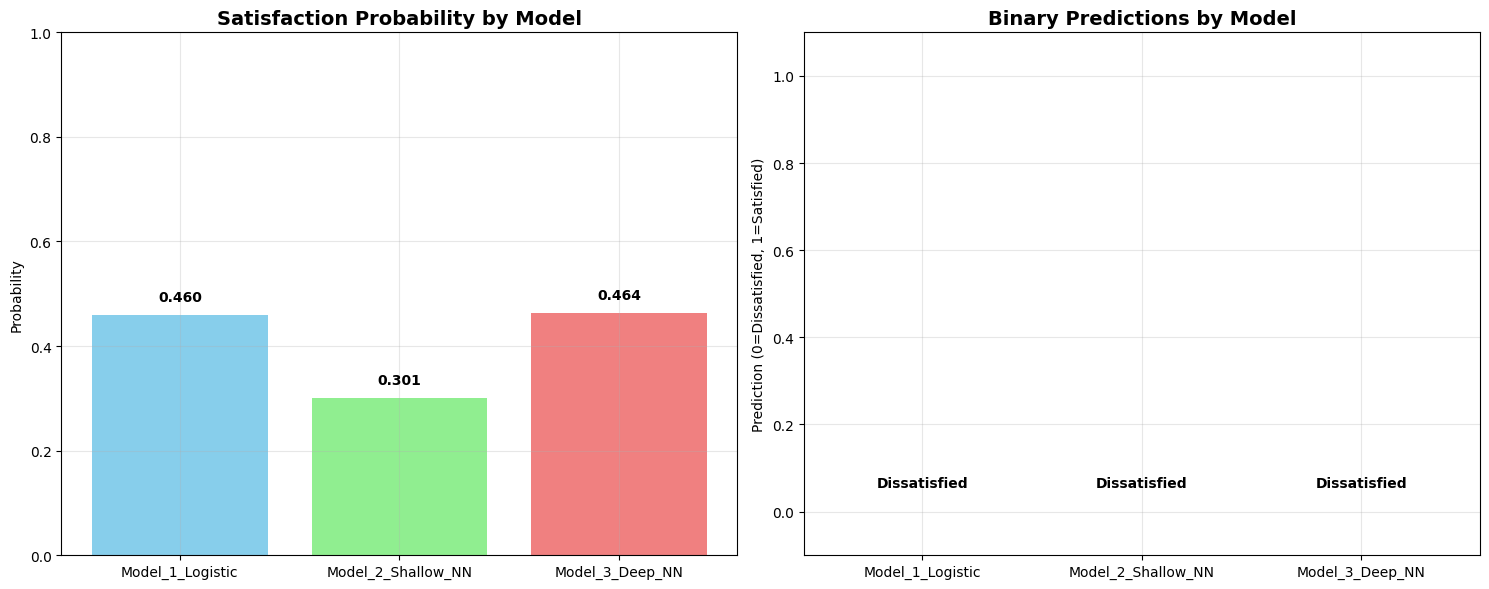

📊 SUMMARY:
😞 All models predict DISSATISFIED

✅ INFERENCE COMPLETE FOR SAMPLE #1


🔍 RUNNING INFERENCE ON SAMPLE #2 (Index: 1454)
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
🔍 INFERENCE RESULTS (Sample #2)

📋 SAMPLE INFORMATION:
• Review Content: Verified Review   Malta to Gatwick. This is for British Airways Catering Service Managers. They have...
• Rating: 6/10
• Traveller Type: Couple Leisure
• Class: Economy Class
• Route: Malta to Gatwick
• Sentiment Score: 0.922
• Actual Satisfaction: ✅ Satisfied

🤖 MODEL PREDICTIONS:
--------------------------------------------------
Model_1_Logistic:
  Prediction: ✅ Satisfied
  Probability: 0.7373
  Confidence: 0.7373

Model_2_Shallow_NN:
  Prediction: ✅ Satisfied
  Probability: 0.6907
  Confidence: 0.6907

Model_3_Deep_NN:
  Prediction: ✅ Satisfied
  Probability: 0.6763
  Confidence: 0.6763



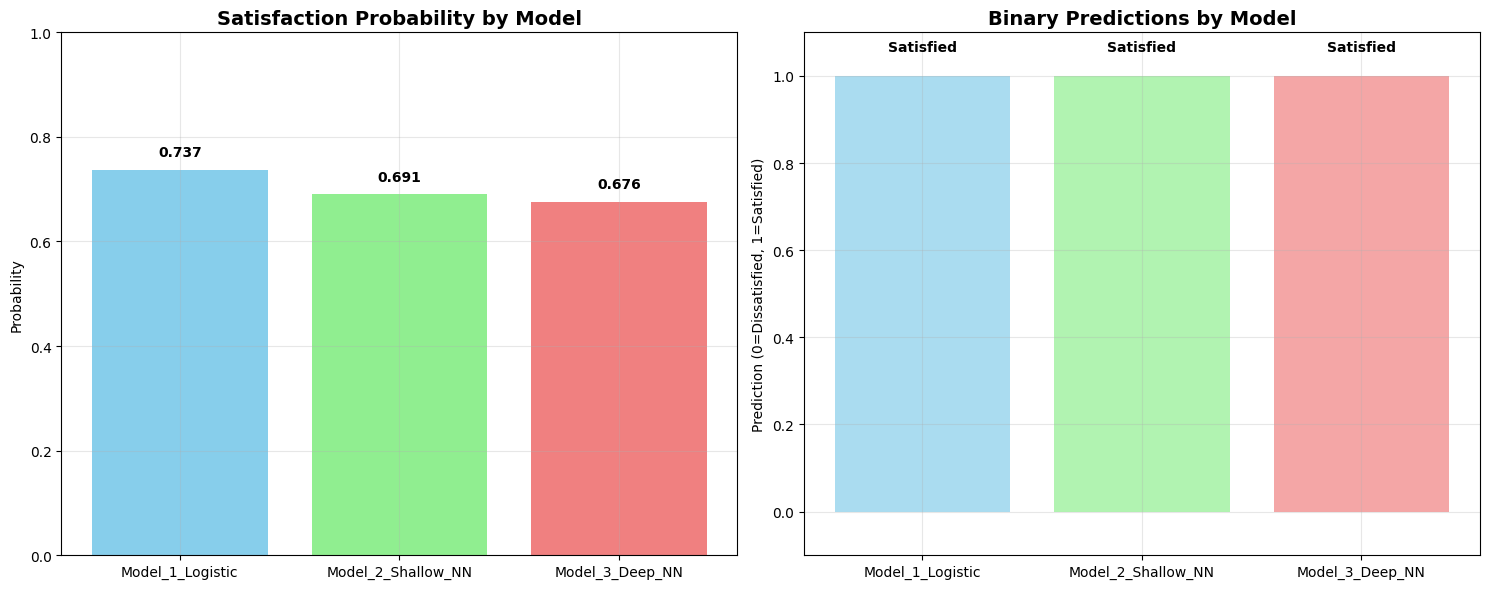

📊 SUMMARY:
🎉 All models predict SATISFIED

✅ INFERENCE COMPLETE FOR SAMPLE #2


🔍 RUNNING INFERENCE ON SAMPLE #3 (Index: 2176)
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
🔍 INFERENCE RESULTS (Sample #3)

📋 SAMPLE INFORMATION:
• Review Content: Verified Review   Oslo to London Heathrow. Check in was chaotic, and ground staff had no idea about ...
• Rating: 3/10
• Traveller Type: Business
• Class: Business Class
• Route: OSL to LHR
• Sentiment Score: -0.899
• Actual Satisfaction: ❌ Dissatisfied

🤖 MODEL PREDICTIONS:
--------------------------------------------------
Model_1_Logistic:
  Prediction: ❌ Dissatisfied
  Probability: 0.0476
  Confidence: 0.9524

Model_2_Shallow_NN:
  Prediction: ❌ Dissatisfied
  Probability: 0.0953
  Confidence: 0.9047

Model_3_Deep_NN:
  Prediction: ❌ Dissatisfied
  Probability: 0.1813
  Confidence: 0.8187



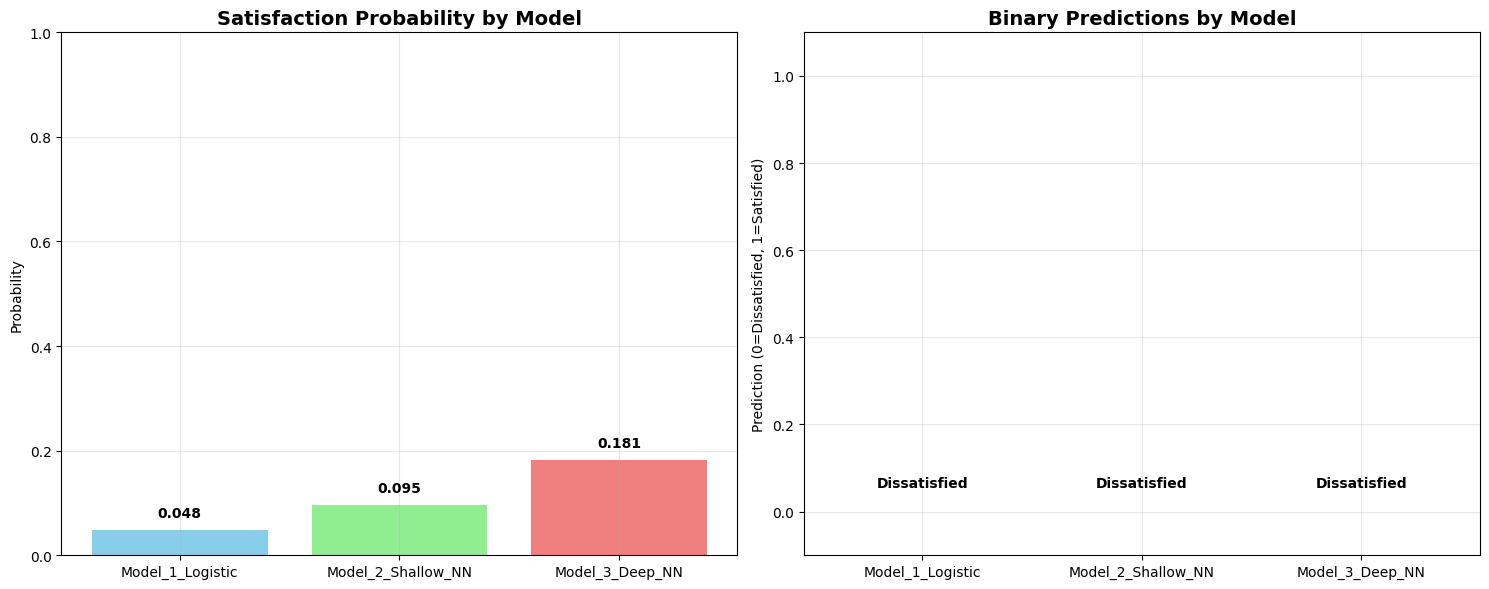

📊 SUMMARY:
😞 All models predict DISSATISFIED

✅ INFERENCE COMPLETE FOR SAMPLE #3

🎉 DEMO COMPLETE! All three models have been tested on random samples.


In [445]:
# DEMO: INFERENCE ON RANDOM SAMPLES
print("=== DEMO: INFERENCE ON RANDOM SAMPLES ===")

# Create top categories dictionary for high-cardinality features
# This should match what was used during training
top_categories_dict = {
    'Route': df_reviews_clean['Route'].value_counts().head(15).index.tolist(),
    'Start_Location': df_reviews_clean['Start_Location'].value_counts().head(15).index.tolist(),
    'End_Location': df_reviews_clean['End_Location'].value_counts().head(15).index.tolist()
}

# 
# f"• {feature}: {len(categories)} categories (e.g., {categories[:3]})")

# Select 3 random samples for demonstration
np.random.seed(42)  # For reproducible results
random_indices = np.random.choice(df_reviews_clean.index, size=3, replace=False)

print(f"\n🎯 Selected random samples: {random_indices.tolist()}")
print("=" * 80)

# Run inference on each sample
for i, sample_idx in enumerate(random_indices, 1):
    print(f"\n🔍 RUNNING INFERENCE ON SAMPLE #{i} (Index: {sample_idx})")
    print("-" * 60)
    
    # Get the sample data
    sample_data = df_reviews_clean.loc[[sample_idx]].copy()
    
    # Make predictions using all three models
    predictions = predict_satisfaction(
        sample_data=sample_data,
        log_model=log_model,
        ffnn_model=ffnn_model,
        model3=model3,
        scaler=scaler,
        X_features=X_features,
        top_categories_dict=top_categories_dict
    )
    
    # Display results
    display_prediction_results(sample_data, predictions, sample_index=i)
    
    print(f"\n{'='*80}")
    print(f"✅ INFERENCE COMPLETE FOR SAMPLE #{i}")
    print(f"{'='*80}\n")

print("🎉 DEMO COMPLETE! All three models have been tested on random samples.")


In [446]:
!pip install shap lime

5391.04s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


## Explainable AI (XAI) Analysis - Model 1 (Logistic Regression)

This section provides comprehensive explainability analysis for Model 1 using SHAP and LIME techniques to understand how different features contribute to satisfaction predictions.

In [447]:
# SHAP ANALYSIS FOR MODEL 1 (LOGISTIC REGRESSION)
print("=" * 80)
print("EXPLAINABLE AI (XAI) ANALYSIS - MODEL 1")
print("=" * 80)

import shap
import matplotlib.pyplot as plt
import numpy as np

print("\n=== SHAP (SHapley Additive exPlanations) Analysis ===\n")
print("SHAP provides model-agnostic explanations by computing the contribution")
print("of each feature to the prediction using game theory concepts.")
print("\nFor Logistic Regression, we use the LinearExplainer which is optimized")
print("for linear models and provides exact SHAP values efficiently.\n")

# Initialize SHAP explainer for logistic regression
# LinearExplainer is specifically designed for linear models
print("Initializing SHAP LinearExplainer...")
explainer = shap.LinearExplainer(log_model, X_train_XAI, feature_perturbation="interventional")

# Calculate SHAP values for test set
print("Computing SHAP values for test set...")
shap_values = explainer.shap_values(X_test_XAI)

print(f"\nSHAP values computed successfully!")
print(f"Shape: {shap_values.shape} (samples x features)")
print(f"\nBase value (expected model output): {explainer.expected_value:.4f}")
print("\n✅ SHAP explainer initialized successfully!")

EXPLAINABLE AI (XAI) ANALYSIS - MODEL 1

=== SHAP (SHapley Additive exPlanations) Analysis ===

SHAP provides model-agnostic explanations by computing the contribution
of each feature to the prediction using game theory concepts.

For Logistic Regression, we use the LinearExplainer which is optimized
for linear models and provides exact SHAP values efficiently.

Initializing SHAP LinearExplainer...
Computing SHAP values for test set...

SHAP values computed successfully!
Shape: (701, 62) (samples x features)

Base value (expected model output): -0.1935

✅ SHAP explainer initialized successfully!


=== SHAP SUMMARY PLOT: Global Feature Importance ===

This plot shows:
• Features ranked by importance (top to bottom)
• Distribution of SHAP values across all test samples
• Feature values: Red = high, Blue = low
• Positive SHAP = pushes prediction toward 'Satisfied'
• Negative SHAP = pushes prediction toward 'Dissatisfied'



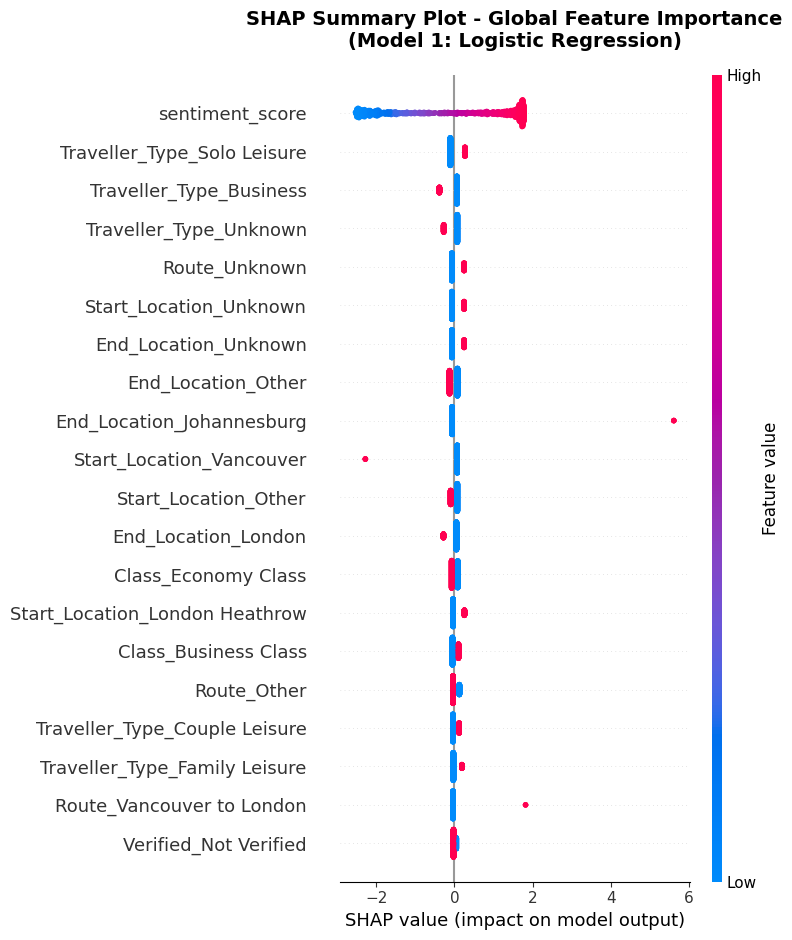


📊 Key Insights from Summary Plot:
• Features at the top have the highest impact on predictions
• The spread shows how consistently a feature affects predictions
• Color indicates whether high/low values increase satisfaction


In [448]:
# SHAP SUMMARY PLOT - Global Feature Importance
print("=== SHAP SUMMARY PLOT: Global Feature Importance ===")
print("\nThis plot shows:")
print("• Features ranked by importance (top to bottom)")
print("• Distribution of SHAP values across all test samples")
print("• Feature values: Red = high, Blue = low")
print("• Positive SHAP = pushes prediction toward 'Satisfied'")
print("• Negative SHAP = pushes prediction toward 'Dissatisfied'\n")

plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_test_XAI, max_display=20, show=False)
plt.title('SHAP Summary Plot - Global Feature Importance\n(Model 1: Logistic Regression)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📊 Key Insights from Summary Plot:")
print("• Features at the top have the highest impact on predictions")
print("• The spread shows how consistently a feature affects predictions")
print("• Color indicates whether high/low values increase satisfaction")


=== SHAP BAR PLOT: Mean Absolute Feature Importance ===

This plot shows the average magnitude of each feature's impact
across all predictions (regardless of direction).



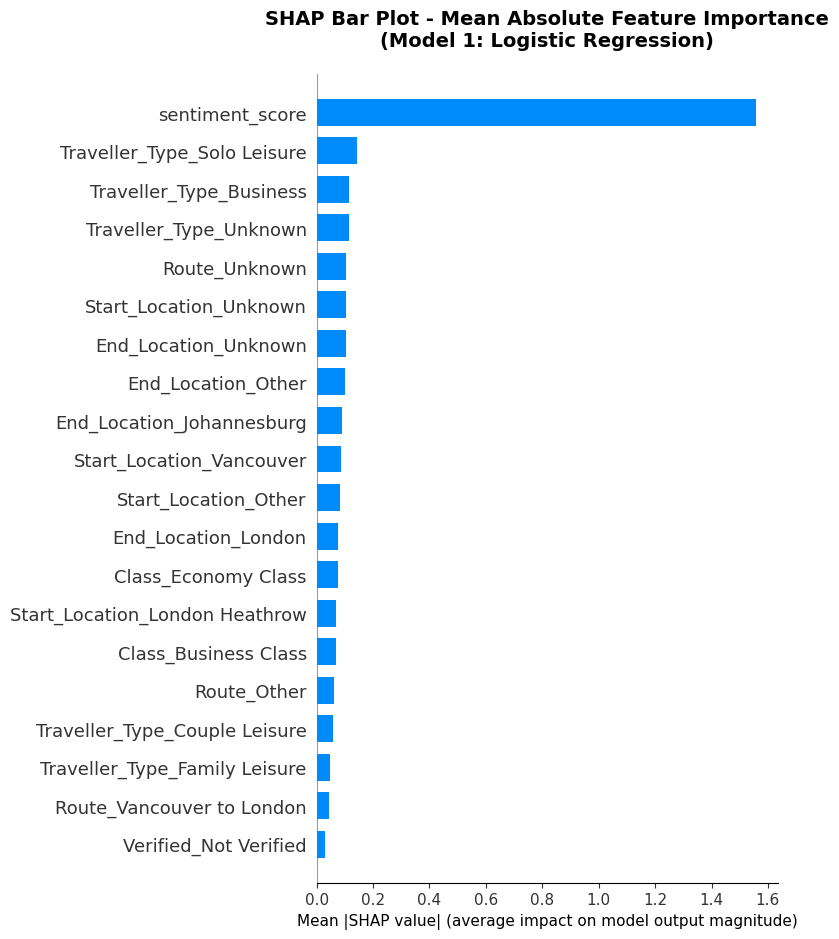


🏆 Top 15 Most Important Features (by mean |SHAP|):
 1. sentiment_score                          | 1.5581
 5. Traveller_Type_Solo Leisure              | 0.1444
 2. Traveller_Type_Business                  | 0.1163
 6. Traveller_Type_Unknown                   | 0.1155
59. End_Location_Unknown                     | 0.1044
43. Start_Location_Unknown                   | 0.1044
27. Route_Unknown                            | 0.1044
57. End_Location_Other                       | 0.0994
49. End_Location_Johannesburg                | 0.0884
44. Start_Location_Vancouver                 | 0.0862
41. Start_Location_Other                     | 0.0815
50. End_Location_London                      | 0.0775
 9. Class_Economy Class                      | 0.0773
35. Start_Location_London Heathrow           | 0.0699
 8. Class_Business Class                     | 0.0684

✅ SHAP global importance analysis complete!


In [449]:
# SHAP BAR PLOT - Mean Absolute SHAP Values
print("\n=== SHAP BAR PLOT: Mean Absolute Feature Importance ===")
print("\nThis plot shows the average magnitude of each feature's impact")
print("across all predictions (regardless of direction).\n")

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_XAI, plot_type="bar", max_display=20, show=False)
plt.title('SHAP Bar Plot - Mean Absolute Feature Importance\n(Model 1: Logistic Regression)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Mean |SHAP value| (average impact on model output magnitude)', fontsize=11)
plt.tight_layout()
plt.show()

# Calculate and display top features
mean_abs_shap = np.abs(shap_values).mean(axis=0)
feature_importance_shap = pd.DataFrame({
    'feature': X_test_XAI.columns,
    'mean_abs_shap': mean_abs_shap
}).sort_values('mean_abs_shap', ascending=False)

print("\n🏆 Top 15 Most Important Features (by mean |SHAP|):")
print("=" * 60)
for i, row in feature_importance_shap.head(15).iterrows():
    print(f"{row.name+1:2d}. {row['feature']:<40} | {row['mean_abs_shap']:.4f}")

print("\n✅ SHAP global importance analysis complete!")


=== SHAP WATERFALL PLOTS: Individual Prediction Explanations ===

Waterfall plots show how each feature contributes to moving the prediction
from the base value (average model output) to the final prediction.


Sample: High Confidence SATISFIED
Predicted Probability: 0.9138
Actual Label: Satisfied
Prediction: Satisfied


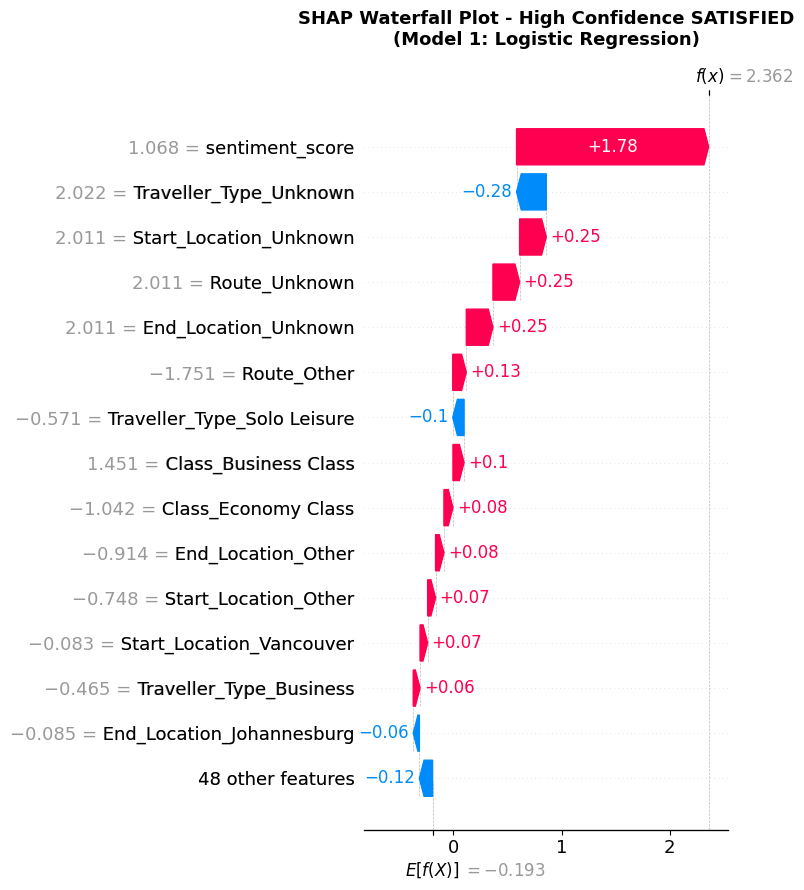


Sample: High Confidence DISSATISFIED
Predicted Probability: 0.0579
Actual Label: Dissatisfied
Prediction: Dissatisfied


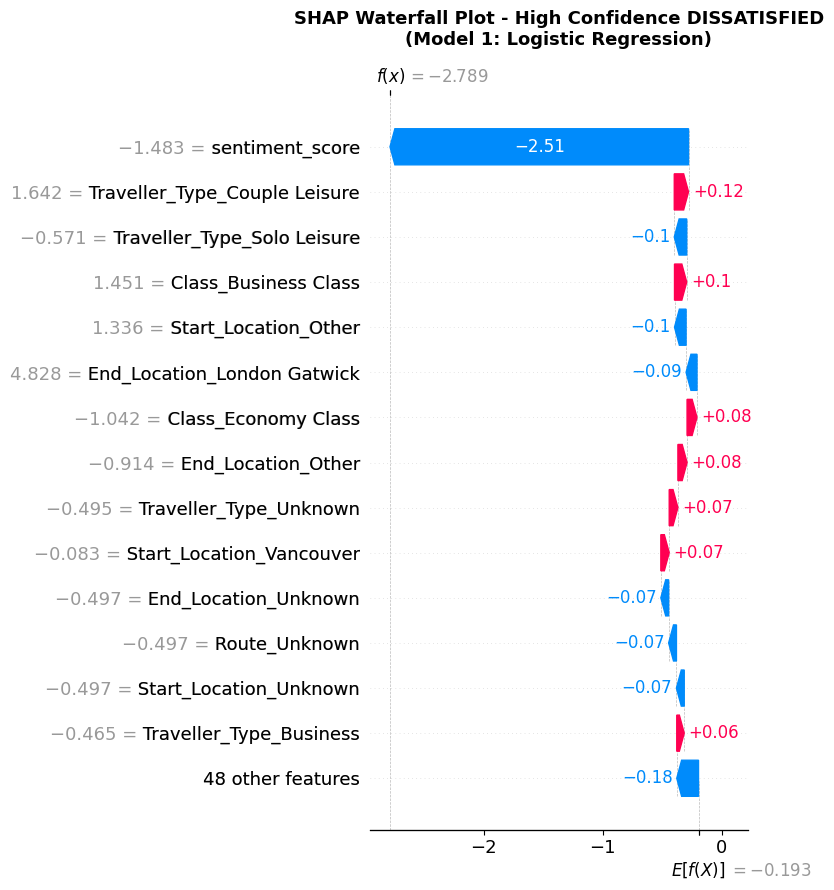


Sample: Borderline Case
Predicted Probability: 0.4539
Actual Label: Satisfied
Prediction: Dissatisfied


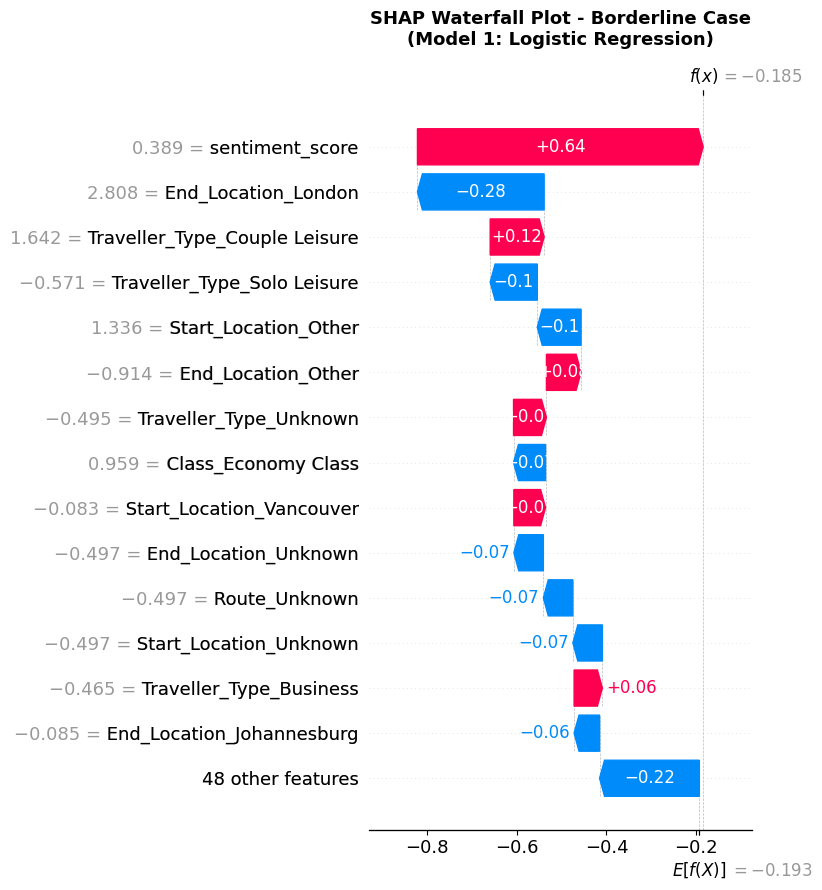


✅ SHAP waterfall plots complete!

📊 Interpretation:
• Start from E[f(X)] (base value = average model output)
• Red bars push prediction toward Satisfied (positive contribution)
• Blue bars push prediction toward Dissatisfied (negative contribution)
• Final value f(x) is the model's actual prediction for this sample


In [450]:
# SHAP WATERFALL PLOTS - Individual Predictions
print("\n=== SHAP WATERFALL PLOTS: Individual Prediction Explanations ===")
print("\nWaterfall plots show how each feature contributes to moving the prediction")
print("from the base value (average model output) to the final prediction.\n")

# Select 3 interesting samples for detailed explanation
# 1. High confidence satisfied
# 2. High confidence dissatisfied  
# 3. Borderline case

y_pred_proba_all = log_model.predict_proba(X_test_XAI)[:, 1]
satisfied_idx = np.where((y_pred_proba_all > 0.9) & (y_test_XAI == 1))[0]
dissatisfied_idx = np.where((y_pred_proba_all < 0.1) & (y_test_XAI == 0))[0]
borderline_idx = np.where((y_pred_proba_all > 0.45) & (y_pred_proba_all < 0.55))[0]

sample_indices = []
sample_labels = []

if len(satisfied_idx) > 0:
    sample_indices.append(satisfied_idx[0])
    sample_labels.append("High Confidence SATISFIED")

if len(dissatisfied_idx) > 0:
    sample_indices.append(dissatisfied_idx[0])
    sample_labels.append("High Confidence DISSATISFIED")

if len(borderline_idx) > 0:
    sample_indices.append(borderline_idx[0])
    sample_labels.append("Borderline Case")

# Create waterfall plots for each sample
for idx, label in zip(sample_indices, sample_labels):
    print(f"\n{'='*70}")
    print(f"Sample: {label}")
    print(f"{'='*70}")
    print(f"Predicted Probability: {y_pred_proba_all[idx]:.4f}")
    print(f"Actual Label: {'Satisfied' if y_test.iloc[idx] == 1 else 'Dissatisfied'}")
    print(f"Prediction: {'Satisfied' if y_pred_proba_all[idx] > 0.5 else 'Dissatisfied'}")
    
    # Create SHAP explanation object for waterfall plot
    shap_exp = shap.Explanation(
        values=shap_values[idx],
        base_values=explainer.expected_value,
        data=X_test_XAI.iloc[idx].values,
        feature_names=X_test_XAI.columns.tolist()
    )
    
    plt.figure(figsize=(14, 8))
    shap.waterfall_plot(shap_exp, max_display=15, show=False)
    plt.title(f'SHAP Waterfall Plot - {label}\n(Model 1: Logistic Regression)', 
              fontsize=13, fontweight='bold', pad=15)
    plt.tight_layout()
    plt.show()

print("\n✅ SHAP waterfall plots complete!")
print("\n📊 Interpretation:")
print("• Start from E[f(X)] (base value = average model output)")
print("• Red bars push prediction toward Satisfied (positive contribution)")
print("• Blue bars push prediction toward Dissatisfied (negative contribution)")
print("• Final value f(x) is the model's actual prediction for this sample")


=== SHAP FORCE PLOTS: Visual Feature Contribution ===

Force plots show feature contributions in a compact visual format.
Features pushing toward Satisfied (red) vs Dissatisfied (blue).




Force Plot: High Confidence SATISFIED


<Figure size 1600x300 with 0 Axes>

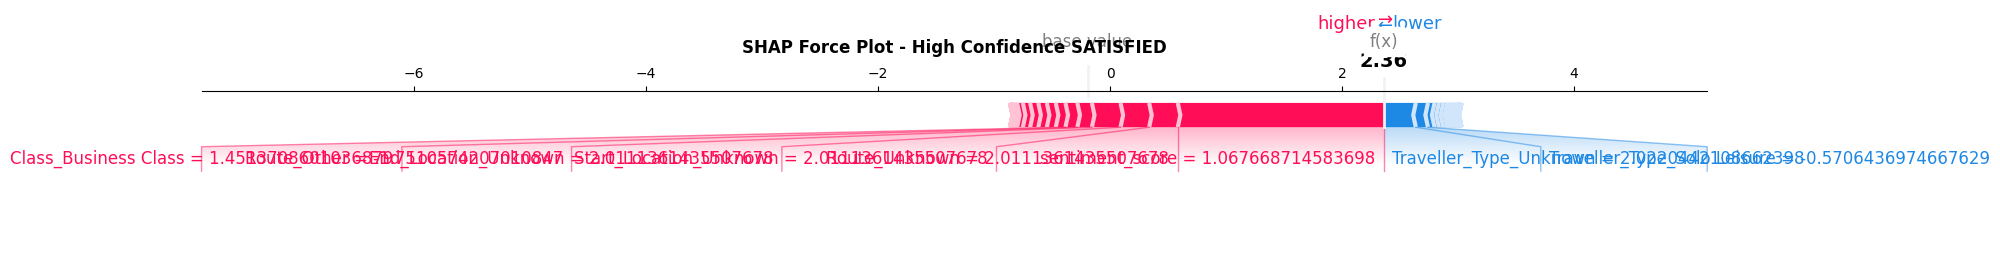


Force Plot: High Confidence DISSATISFIED


<Figure size 1600x300 with 0 Axes>

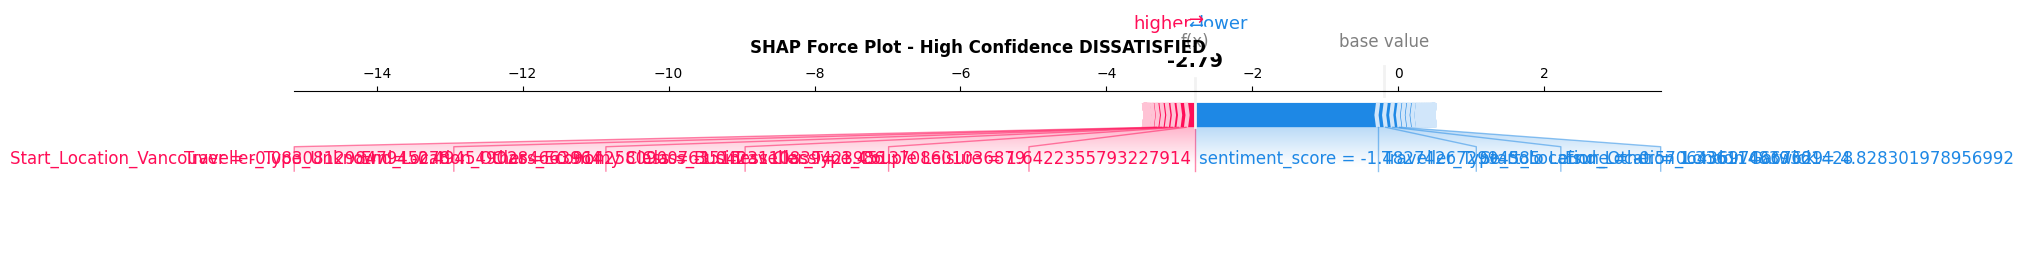


✅ SHAP force plots complete!


In [451]:
# SHAP FORCE PLOTS - Interactive Visualizations
print("\n=== SHAP FORCE PLOTS: Visual Feature Contribution ===")
print("\nForce plots show feature contributions in a compact visual format.")
print("Features pushing toward Satisfied (red) vs Dissatisfied (blue).\n")

# Initialize JavaScript visualization
shap.initjs()

# Create force plots for the same samples
for idx, label in zip(sample_indices[:2], sample_labels[:2]):  # Show first 2
    print(f"\n{'='*70}")
    print(f"Force Plot: {label}")
    print(f"{'='*70}")
    
    # Create matplotlib-based force plot (since interactive may not work in all environments)
    plt.figure(figsize=(16, 3))
    shap.force_plot(
        explainer.expected_value,
        shap_values[idx],
        X_test_XAI.iloc[idx],
        matplotlib=True,
        show=False,
        feature_names=X_test_XAI.columns.tolist()
    )
    plt.title(f'SHAP Force Plot - {label}', fontsize=12, fontweight='bold', pad=10)
    plt.tight_layout()
    plt.show()

print("\n✅ SHAP force plots complete!")

In [452]:
# LIME ANALYSIS FOR MODEL 1 (LOGISTIC REGRESSION)
print("\n" + "=" * 80)
print("=== LIME (Local Interpretable Model-agnostic Explanations) Analysis ===")
print("=" * 80)

import lime
import lime.lime_tabular

print("\nLIME explains individual predictions by fitting a simple interpretable")
print("model (like linear regression) locally around the prediction.\n")

print("Key differences from SHAP:")
print("• SHAP: Based on game theory, provides consistent global importance")
print("• LIME: Local approximation, faster but less consistent across samples\n")

# Initialize LIME explainer
print("Initializing LIME TabularExplainer...")
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_XAI.values,
    feature_names=X_train_XAI.columns.tolist(),
    class_names=['Dissatisfied', 'Satisfied'],
    mode='classification',
    random_state=42
)

print("✅ LIME explainer initialized successfully!")
print(f"\nTraining set size: {X_train_XAI.shape[0]} samples")
print(f"Number of features: {X_train_XAI.shape[1]}")


=== LIME (Local Interpretable Model-agnostic Explanations) Analysis ===

LIME explains individual predictions by fitting a simple interpretable
model (like linear regression) locally around the prediction.

Key differences from SHAP:
• SHAP: Based on game theory, provides consistent global importance
• LIME: Local approximation, faster but less consistent across samples

Initializing LIME TabularExplainer...
✅ LIME explainer initialized successfully!

Training set size: 2800 samples
Number of features: 62



=== LIME Individual Explanations ===

Generating LIME explanations for the same samples analyzed with SHAP...


LIME Explanation: High Confidence SATISFIED
Predicted Probability: 0.9138
Actual Label: Satisfied
Prediction: Satisfied

Generating LIME explanation (sampling neighborhood)...


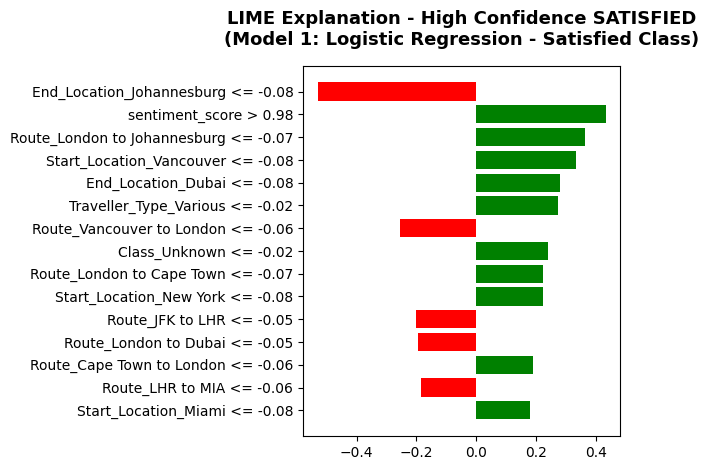


📊 Top Feature Contributions (for 'Satisfied' class):
  End_Location_Johannesburg <= -0.08            | -0.5309 → DISSATISFIED
  sentiment_score > 0.98                        | +0.4333 → SATISFIED
  Route_London to Johannesburg <= -0.07         | +0.3655 → SATISFIED
  Start_Location_Vancouver <= -0.08             | +0.3349 → SATISFIED
  End_Location_Dubai <= -0.08                   | +0.2794 → SATISFIED
  Traveller_Type_Various <= -0.02               | +0.2737 → SATISFIED
  Route_Vancouver to London <= -0.06            | -0.2534 → DISSATISFIED
  Class_Unknown <= -0.02                        | +0.2408 → SATISFIED
  Route_London to Cape Town <= -0.07            | +0.2236 → SATISFIED
  Start_Location_New York <= -0.08              | +0.2222 → SATISFIED

Local Model R² Score: 0.3970
(How well the local linear model fits the neighborhood)


LIME Explanation: High Confidence DISSATISFIED
Predicted Probability: 0.0579
Actual Label: Dissatisfied
Prediction: Dissatisfied

Generating LIME explan

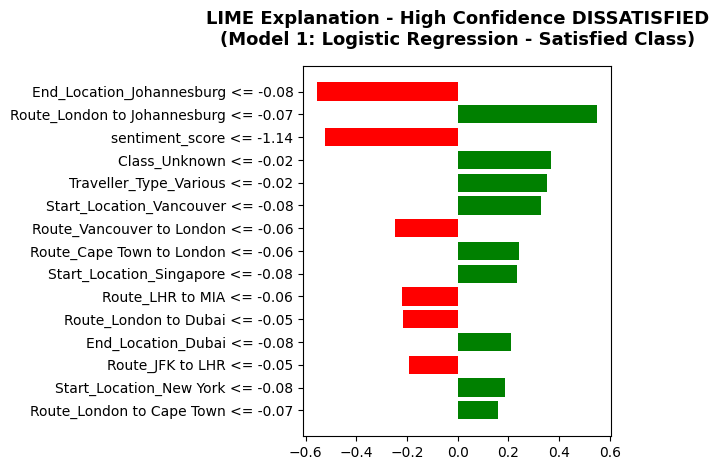


📊 Top Feature Contributions (for 'Satisfied' class):
  End_Location_Johannesburg <= -0.08            | -0.5548 → DISSATISFIED
  Route_London to Johannesburg <= -0.07         | +0.5505 → SATISFIED
  sentiment_score <= -1.14                      | -0.5240 → DISSATISFIED
  Class_Unknown <= -0.02                        | +0.3691 → SATISFIED
  Traveller_Type_Various <= -0.02               | +0.3511 → SATISFIED
  Start_Location_Vancouver <= -0.08             | +0.3272 → SATISFIED
  Route_Vancouver to London <= -0.06            | -0.2481 → DISSATISFIED
  Route_Cape Town to London <= -0.06            | +0.2408 → SATISFIED
  Start_Location_Singapore <= -0.08             | +0.2332 → SATISFIED
  Route_LHR to MIA <= -0.06                     | -0.2209 → DISSATISFIED

Local Model R² Score: 0.5650
(How well the local linear model fits the neighborhood)


LIME Explanation: Borderline Case
Predicted Probability: 0.4539
Actual Label: Satisfied
Prediction: Dissatisfied

Generating LIME explanation (sam

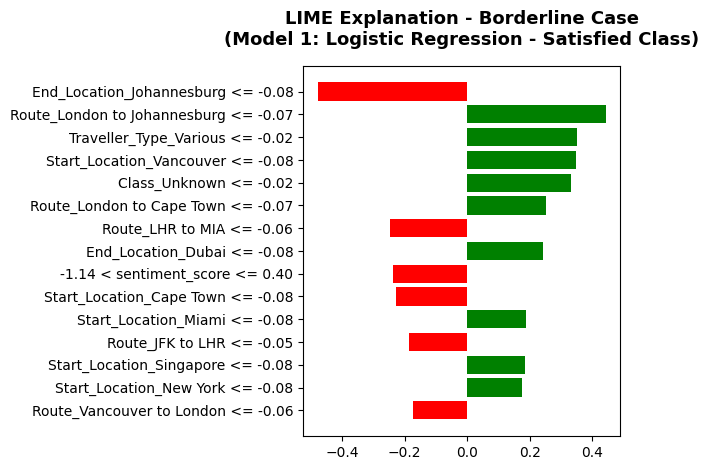


📊 Top Feature Contributions (for 'Satisfied' class):
  End_Location_Johannesburg <= -0.08            | -0.4791 → DISSATISFIED
  Route_London to Johannesburg <= -0.07         | +0.4430 → SATISFIED
  Traveller_Type_Various <= -0.02               | +0.3499 → SATISFIED
  Start_Location_Vancouver <= -0.08             | +0.3474 → SATISFIED
  Class_Unknown <= -0.02                        | +0.3320 → SATISFIED
  Route_London to Cape Town <= -0.07            | +0.2532 → SATISFIED
  Route_LHR to MIA <= -0.06                     | -0.2478 → DISSATISFIED
  End_Location_Dubai <= -0.08                   | +0.2428 → SATISFIED
  -1.14 < sentiment_score <= 0.40               | -0.2386 → DISSATISFIED
  Start_Location_Cape Town <= -0.08             | -0.2276 → DISSATISFIED

Local Model R² Score: 0.1639
(How well the local linear model fits the neighborhood)


✅ LIME explanations complete!


In [453]:
# LIME EXPLANATIONS FOR INDIVIDUAL PREDICTIONS
print("\n=== LIME Individual Explanations ===")
print("\nGenerating LIME explanations for the same samples analyzed with SHAP...\n")

# Generate LIME explanations for the same samples
for idx, label in zip(sample_indices, sample_labels):
    print(f"\n{'='*70}")
    print(f"LIME Explanation: {label}")
    print(f"{'='*70}")
    
    # Get the sample
    sample = X_test_XAI.iloc[idx].values
    
    print(f"Predicted Probability: {y_pred_proba_all[idx]:.4f}")
    print(f"Actual Label: {'Satisfied' if y_test_XAI.iloc[idx] == 1 else 'Dissatisfied'}")
    print(f"Prediction: {'Satisfied' if y_pred_proba_all[idx] > 0.5 else 'Dissatisfied'}\n")
    
    # Generate explanation
    print("Generating LIME explanation (sampling neighborhood)...")
    lime_exp = lime_explainer.explain_instance(
        sample,
        log_model.predict_proba,
        num_features=15,
        num_samples=5000
    )
    
    # Display as figure
    fig = lime_exp.as_pyplot_figure(label=1)  # label=1 for 'Satisfied' class
    plt.title(f'LIME Explanation - {label}\n(Model 1: Logistic Regression - Satisfied Class)', 
              fontsize=13, fontweight='bold', pad=15)
    plt.tight_layout()
    plt.show()
    
    # Print text explanation
    print("\n📊 Top Feature Contributions (for 'Satisfied' class):")
    print("=" * 60)
    for feature, weight in lime_exp.as_list(label=1)[:10]:
        direction = "→ SATISFIED" if weight > 0 else "→ DISSATISFIED"
        print(f"  {feature:<45} | {weight:+.4f} {direction}")
    
    print(f"\nLocal Model R² Score: {lime_exp.score:.4f}")
    print("(How well the local linear model fits the neighborhood)\n")

print("\n✅ LIME explanations complete!")